In [1]:
import sys
import os
basef = "/mnt/data/Anastasia/"
wdirs = [basef+"19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY"]

dfiles = []
for dirt in wdirs:
    basedir = dirt
    files = os.listdir(basedir)
    if dirt[-1] != '/':
        dirt = dirt+'/'
    for f in files:
        if f[-4:]=='.tif': 
            try:
                i = int(f[-5])
                dfiles.append(dirt+f)
            except:
                pass

            
wdir = wdirs[0]
               
  
            
#dfiles = dfiles[4:8]
dfiles.sort()
print(len(dfiles))
print(dfiles)

dfileswB = [dfiles[0],dfiles[-2],dfiles[-1]]

10
['/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell10_11.tif', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell1_1.tif', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell2_2.tif', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell3_4.tif', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell4_5.tif', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell5_6.tif', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell6_7.tif', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell7_8.tif', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell8_9.tif', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell9_10.tif']


In [2]:
dfilesB = []
for dirt in wdirs:
    files = os.listdir(basedir)
    if dirt[-1] != '/':
        dirt = dirt+'/'
    for f in files:
        if f[-9:]=='beads.txt': 
            try:
                #i = int(f[-5])
                dfilesB.append(dirt+f)
            except:
                pass

dfilesB.sort()

In [3]:
sys.path.append("/export/home1/users/bssn/serna/GitIBENS/Nanorods")
from numpy import *
from matplotlib.pylab import *
import scipy.optimize as opt
import pickle
from scipy.optimize import minimize,least_squares
from scipy.stats import linregress

%matplotlib inline

In [4]:
from sub.cor2img import transfpar,coincidROI

In [5]:
dataL = []
nwdirs = []
for i,cfile in enumerate(dfiles):
    wdir = ''
    cf2 = cfile.split(".")[0].split("/")
    for fs in cf2[:-1]:
        wdir = wdir+fs+'/'
    wdir = wdir+cf2[-1]+'output/sptrack/'
    nwdirs.append(wdir)
    
    #with open(wdir+'data_msd.pickle', 'rb') as handle:
    #    datat = pickle.load(handle)
    
    #dataL.append(datat)
print(nwdirs,len(dataL))

dfilesF = []
dfilesPA = []
dfilesFPA = []

dfilesPB = []
driftcorrected = True
for i,dirt in enumerate(nwdirs):
    basedir = dirt
    dfilesPA.append(basedir+'../posA.dat')
    dfilesFPA.append(basedir+'../FposA.dat')
    dfilesPB.append(basedir+'../posB.dat')
    try:
        files = os.listdir(basedir)
        dfilest = []
        if driftcorrected:
            #print(files[0])
            for f in files:

                if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]=='DC': dfilest.append(basedir+f)
        else:
            for f in files:
                if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]!='DC': dfilest.append(basedir+f)
    except:
        pass
    dfilest.sort()
    dfilesF.extend(dfilest)
    
dfilesPA.sort()
dfilesPB.sort()
print(dfilesPA)
    


['/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell10_11output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell1_1output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell2_2output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell3_4output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell4_5output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell5_6output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell6_7output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell7_8output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell8_9output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell9_10output/sptrack/'] 0
['/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell10_11output/sptrack/../p

In [6]:
dfilesPAwB = [dfilesPA[0],dfilesPA[-2],dfilesPA[-1]]

In [7]:
idBeads = []
posBeads = []
for i in range(len(dfilesB)):
    bd0 = array(loadtxt(dfilesB[i]),dtype=int)
    pos0 = array(loadtxt(dfilesPAwB[i]))
    print(dfilesB[i],dfilesPAwB[i])
    selection = array(coincidROI(bd0,pos0,err = 3),dtype=int)
    idBeads.append(selection[:,1].tolist())
    posBeads.append(array(pos0[selection[:,1].tolist()],dtype=int))
    print(bd0.shape[0],selection.shape[0])


/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell10beads.txt /mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell10_11output/sptrack/../posA.dat
28 20
/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell8_beads.txt /mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell8_9output/sptrack/../posA.dat
20 16
/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell9_beads.txt /mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell9_10output/sptrack/../posA.dat
22 19


Now we need to fit to gaussians this ROIS too, the most likely case is that it was not done before. They do not blink, so they should not have passed the test.


We need to add the function extractROIS from Nanorods/tools

In [8]:
from tools.extracting_ROIfrommovie import extractROIS,fitRois
import warnings
warnings.simplefilter("ignore")

In [9]:
nwdirsB = [nwdirs[0],nwdirs[-2],nwdirs[-1]]
print(nwdirsB)

['/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell10_11output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell8_9output/sptrack/', '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell9_10output/sptrack/']


In [55]:
beadp = []
redoFits = False
for i,nwdir in enumerate(nwdirsB):
    cfile = dfileswB[i]
    print(cfile)
    try:
        basedirt = nwdir+"beads/"
        files = os.listdir(basedirt)
        dfilest = []
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh': dfilest.append(basedirt+f)
    except:
        dfilest = []
    if len(dfilest)>0 and not redoFits:
        print("There were some files we don't rerun the fit in "+nwdir)
        fullp = []
        for f in dfilest:
            popts = load(f)
            fullp.append(popts)
        beadp.append(array(fullp))
    else:
        print("We are fitting bead positions here: "+nwdir)
        rois = extractROIS(cfile,posBeads[i],output_folder=nwdir+"beads/")
        fullp = fitRois(rois,nsel1 = 200)
        print(fullp[0].shape)
        for j,popts in enumerate(fullp):
            save(nwdir+"beads/posh_"+str(j).zfill(2)+".npy",popts)
        beadp.append(array(fullp))        

beadp = beadp
rois = 0
fullp = 0

/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell10_11.tif
There were some files we don't rerun the fit in /mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell10_11output/sptrack/
/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell8_9.tif
There were some files we don't rerun the fit in /mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell8_9output/sptrack/
/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell9_10.tif
There were some files we don't rerun the fit in /mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell9_10output/sptrack/


In [56]:
beadp[0].shape

(20, 6000, 8)

In [11]:
def running_mean(x, N):
    cumsumt = cumsum(insert(x, 0, 0)) 
    return (cumsumt[N:] - cumsumt[:-N]) / float(N)


In [12]:
def driftSingle(popts,th =0.0,th2 = 13.0,minlength=1000):
    posx = popts[:,5]
    posy = popts[:,6]
    amp = popts[:,0]
    ampbg = popts[:,0]/popts[:,4]
     

    sel = (popts[:,-1]==0)*(posx>0.1)*(posy>0.1)*(posx<4.9)*(posy<4.9)*(amp>exp(th))*(amp<exp(th2))
    if sel.sum()>minlength:
        dx = posx[sel][1:]-posx[sel][:-1]
        dy = posy[sel][1:]-posy[sel][:-1]
        return([dx.mean(),dy.mean(),amp[sel].mean(),dx.std(),dy.std(),ampbg[sel].mean()])
    else:
        return([nan,nan,nan,nan,nan,nan])
        


In [13]:
driftNR = []
posNR = []

for i,wdir in enumerate(nwdirs):
    try:
        files = os.listdir(wdir)
        pfiles = []
        # drift uncorrected
        for f in files:
            if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]!='DC': pfiles.append(wdir+f)


        pos0 = array(loadtxt(dfilesFPA[i]))
        posNR.append(pos0)
        for ni,name in enumerate(pfiles):
            popts = load(name)
            dr = driftSingle(popts)
            dr.extend([ni,i])
            driftNR.append(dr) 

            if ni%1000 == 0: print(ni)
    except:
        pass
    
driftNR = array(driftNR)

0
1000
2000
0
0
1000
0
0
1000
0
1000
0
1000
2000
3000
0
1000
2000
3000
0
0
1000
2000


In [16]:
print(driftNR[driftNR[:,-1]==0,:].shape,posNR[0].shape)

(2049, 8) (1014, 2)


In [17]:
driftBeads = []
for j,fullp in enumerate(beadp):
    for ni in range(len(fullp)):
        popts = fullp[ni]
        dr = driftSingle(popts)
        dr.extend([ni,j])
        driftBeads.append(dr) 
        if ni%1000 == 0: print(ni)
            
driftBeads = array(driftBeads)

0
0
0


In [18]:
len(fullp)

19

(55, 8)
20
16
19


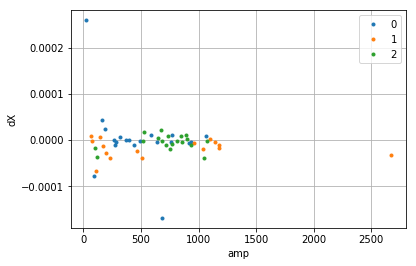

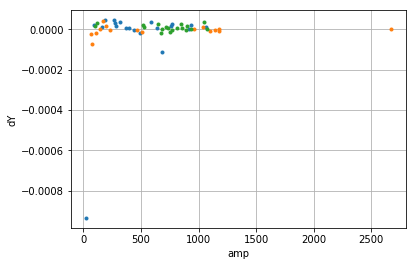

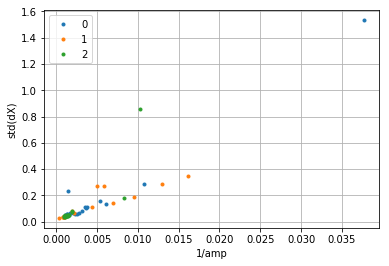

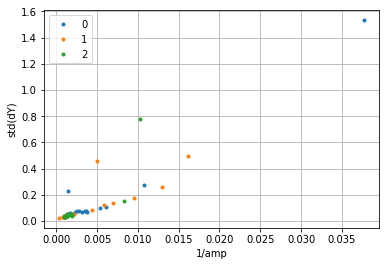

In [19]:
drifts = driftBeads*1.0
print(drifts.shape)
drifts[:,5] = drifts[:,3]
drifts[:,3] = drifts[:,-1]
figure()
plot(drifts[drifts[:,3]==0,2],drifts[drifts[:,3]==0,0],'.',label="0")
plot(drifts[drifts[:,3]==1,2],drifts[drifts[:,3]==1,0],'.',label="1")
plot(drifts[drifts[:,3]==2,2],drifts[drifts[:,3]==2,0],'.',label="2")
ylabel("dX")
xlabel("amp")
grid()
legend()
figure()
plot(drifts[drifts[:,3]==0,2],drifts[drifts[:,3]==0,1],'.',label="0")
plot(drifts[drifts[:,3]==1,2],drifts[drifts[:,3]==1,1],'.',label="1")
plot(drifts[drifts[:,3]==2,2],drifts[drifts[:,3]==2,1],'.',label="2")
ylabel("dY")
xlabel("amp")
grid()
figure()

plot(1.0/drifts[drifts[:,3]==0,2],drifts[drifts[:,3]==0,4],'.',label="0")
plot(1.0/drifts[drifts[:,3]==1,2],drifts[drifts[:,3]==1,4],'.',label="1")
plot(1.0/drifts[drifts[:,3]==2,2],drifts[drifts[:,3]==2,4],'.',label="2")
ylabel("std(dX)")
xlabel("1/amp")
grid()
legend()
figure()
plot(1.0/drifts[drifts[:,3]==0,2],drifts[drifts[:,3]==0,5],'.',label="0")
plot(1.0/drifts[drifts[:,3]==1,2],drifts[drifts[:,3]==1,5],'.',label="1")
plot(1.0/drifts[drifts[:,3]==2,2],drifts[drifts[:,3]==2,5],'.',label="2")
ylabel("std(dY)")
xlabel("1/amp")
grid()

print(len(drifts[drifts[:,3]==0,2]))
print(len(drifts[drifts[:,3]==1,2]))
print(len(drifts[drifts[:,3]==2,2]))

legend()

In [20]:
colors = ['#505050', '#e69f00','#56b4e9','#009e73','#e8dc45','#0072b2','#d55e00','#cc79a7', '#e5ae38','#008fd5','#6d904f', '#fc4f30', '#8b8b8b', '#810f7c']
colors2 = ['#377eb8','#ff7f00','#4daf4a','#e41a1c','#984ea3','#ffff33','#a65628','#f781bf','#999999']

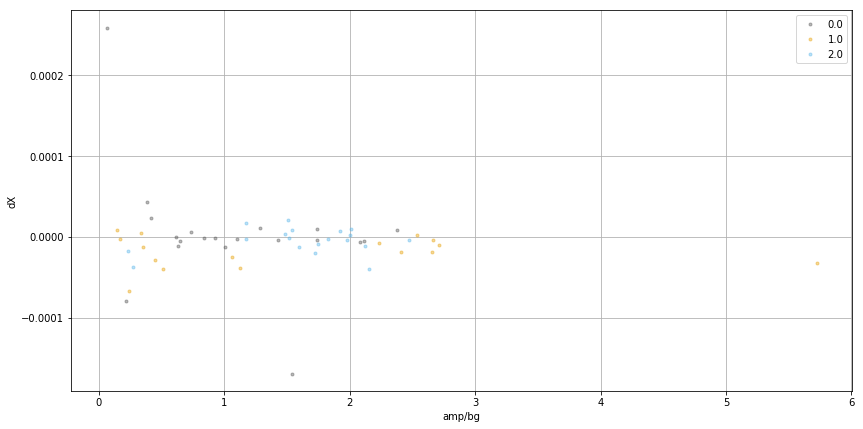

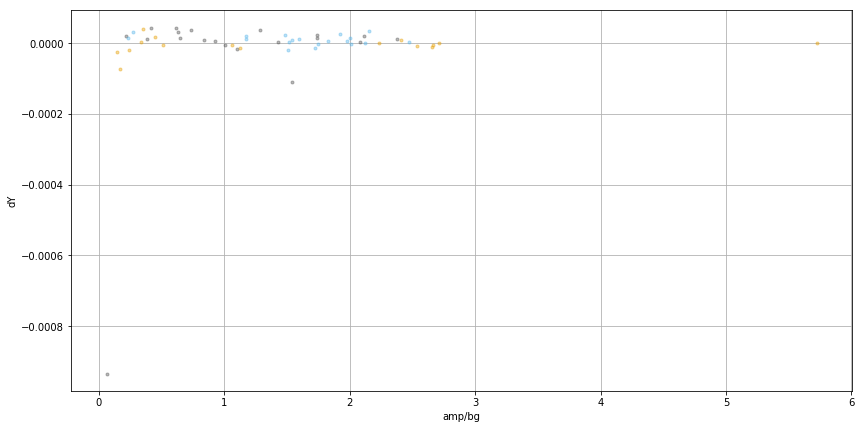

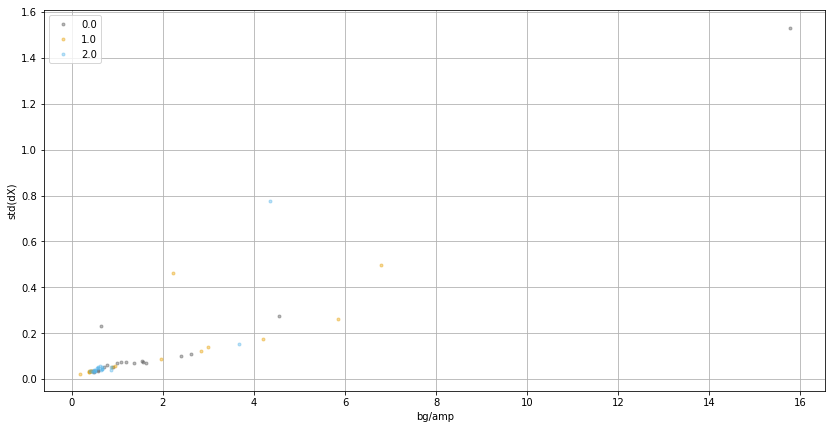

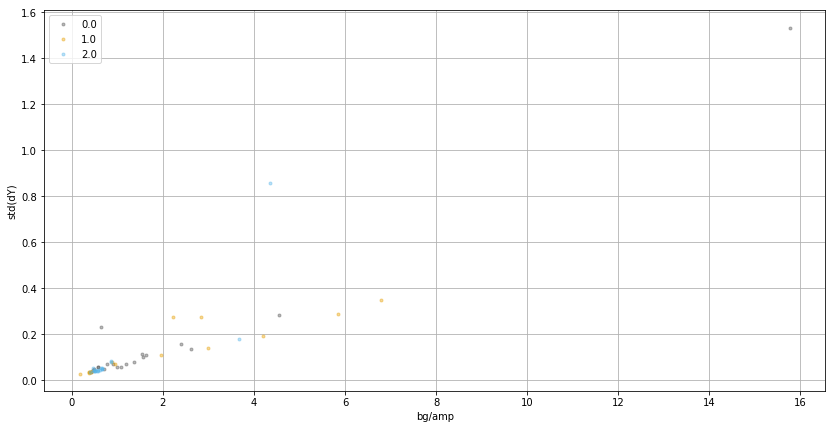

In [21]:
rc('axes', prop_cycle=(cycler('color',colors)))

ddt = driftBeads*1.0
figure(figsize=(14,7))
for ni in set(ddt[:,-1]):
    plot(ddt[ddt[:,-1]==ni,5],ddt[ddt[:,-1]==ni,0],'.',label=ni,alpha=0.4)
ylabel("dX")
xlabel("amp/bg")
grid()
#ylim(-.0001,0.0001)
legend()
savefig("Beads_driftX.png")

figure(figsize=(14,7))
for ni in set(ddt[:,-1]):
    plot(ddt[ddt[:,-1]==ni,5],ddt[ddt[:,-1]==ni,1],'.',label=ni,alpha=0.4)
ylabel("dY")
xlabel("amp/bg")
grid()
#ylim(-.0001,0.0001)
savefig("Beads_driftY.png")

figure(figsize=(14,7))

for ni in set(ddt[:,-1]):
    plot(1.0/ddt[ddt[:,-1]==ni,5],ddt[ddt[:,-1]==ni,3],'.',label=ni,alpha=0.4)
ylabel("std(dX)")
xlabel("bg/amp")
grid()
legend()
savefig("Beads_driftstX.png")

figure(figsize=(14,7))
for ni in set(ddt[:,-1]):
    plot(1.0/ddt[ddt[:,-1]==ni,5],ddt[ddt[:,-1]==ni,4],'.',label=ni,alpha=0.4)
ylabel("std(dY)")
xlabel("bg/amp")
grid()

legend()
savefig("Beads_driftstY.png")


In [22]:
set(driftNR[:,-1])

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}

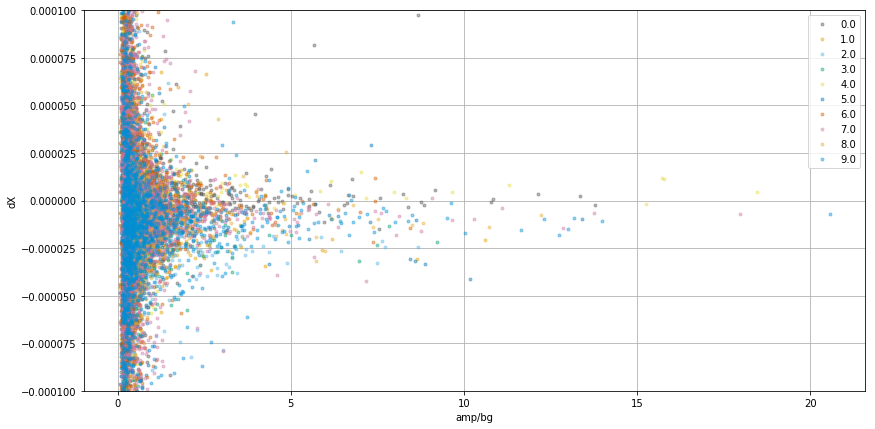

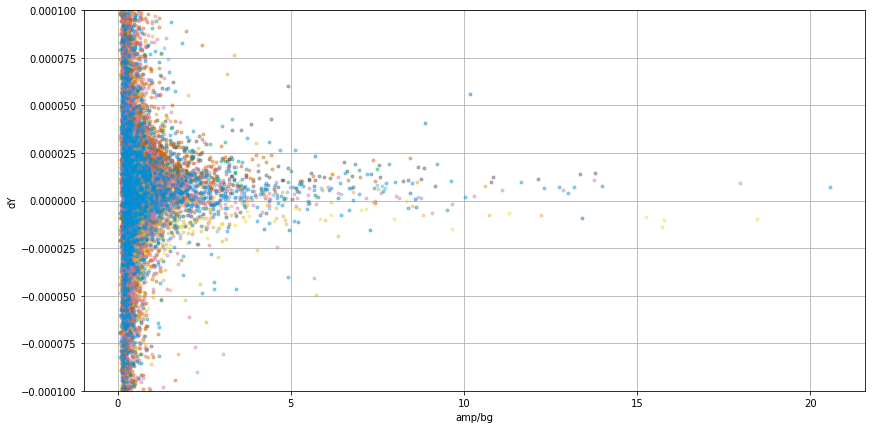

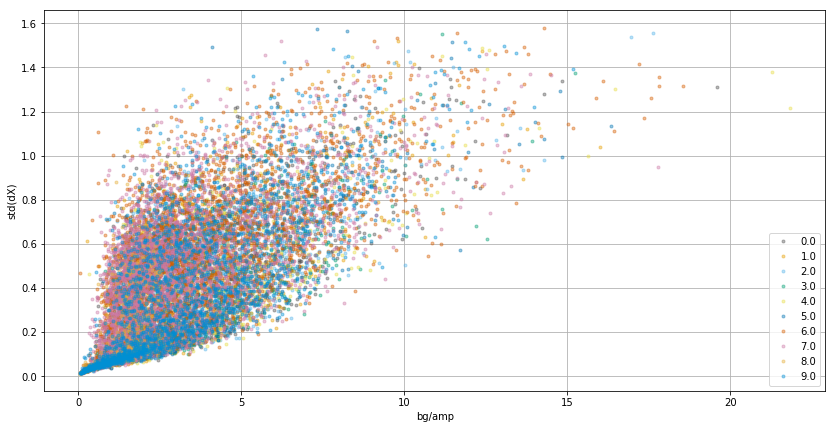

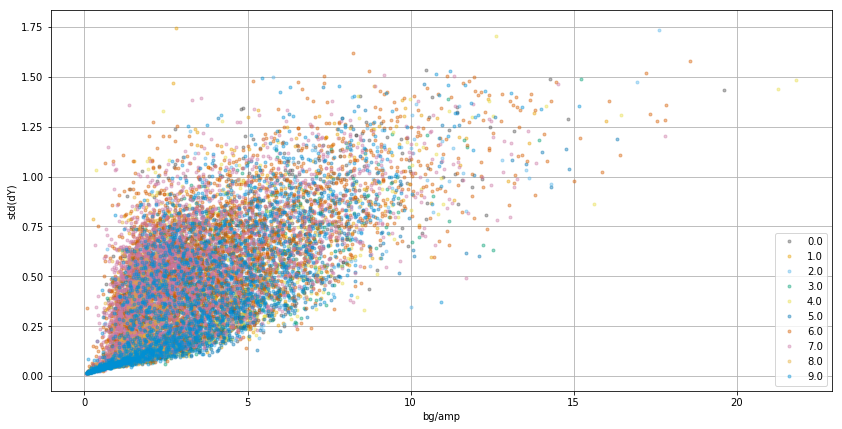

In [23]:
rc('axes', prop_cycle=(cycler('color',colors)))

ddt = driftNR*1.0
figure(figsize=(14,7))
for ni in set(ddt[:,-1]):
    plot(ddt[ddt[:,-1]==ni,5],ddt[ddt[:,-1]==ni,0],'.',label=ni,alpha=0.4)
ylabel("dX")
xlabel("amp/bg")
grid()
ylim(-.0001,0.0001)
legend()
savefig("NanoRods_driftX.png")

figure(figsize=(14,7))
for ni in set(ddt[:,-1]):
    plot(ddt[ddt[:,-1]==ni,5],ddt[ddt[:,-1]==ni,1],'.',label=ni,alpha=0.4)
ylabel("dY")
xlabel("amp/bg")
grid()
ylim(-.0001,0.0001)
savefig("NanoRods_driftY.png")

figure(figsize=(14,7))

for ni in set(ddt[:,-1]):
    plot(1.0/ddt[ddt[:,-1]==ni,5],ddt[ddt[:,-1]==ni,3],'.',label=ni,alpha=0.4)
ylabel("std(dX)")
xlabel("bg/amp")
grid()
legend()
savefig("NanoRods_driftstX.png")

figure(figsize=(14,7))
for ni in set(ddt[:,-1]):
    plot(1.0/ddt[ddt[:,-1]==ni,5],ddt[ddt[:,-1]==ni,4],'.',label=ni,alpha=0.4)
ylabel("std(dY)")
xlabel("bg/amp")
grid()

legend()
savefig("NanoRods_driftstY.png")


In [24]:
stNRs = []
stBeads = []
ddt = driftNR*1.0
for ni in set(ddt[:,-1]):
    xt = ddt[(ddt[:,-1]==ni)*isfinite(ddt[:,1]),:2]
    #lt = xt.shape[0]
    #xt0 = xt[xt[:,0].argsort(),0]
    
    stNRs.append(xt.std(axis=0)*2)
ddt = driftBeads*1.0
for ni in set(ddt[:,-1]):
    xt = ddt[(ddt[:,-1]==ni)*isfinite(ddt[:,1]),:2]
    stBeads.append(xt.std(axis=0)*2)
stNRs = array(stNRs)
stBeads = array(stBeads)

In [25]:
stNRs

array([[0.00025707, 0.00025396],
       [0.00028304, 0.00026631],
       [0.0003105 , 0.00030005],
       [0.00024746, 0.00025975],
       [0.00024241, 0.00029204],
       [0.00024836, 0.00026053],
       [0.00034537, 0.00035035],
       [0.00029395, 0.00029853],
       [0.00012605, 0.0001343 ],
       [0.00025976, 0.00026226]])

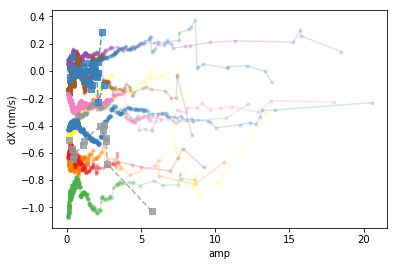

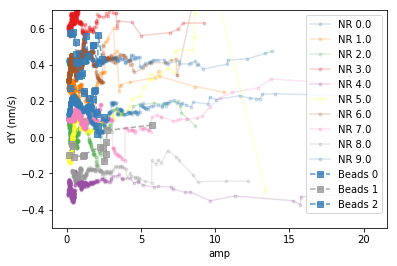

In [225]:
ddt = driftNR*1.0


pxfr = 325/ 10e-3 # scale pixel per frame

for i,ni in enumerate(set(ddt[:,-1])):
    sx,sy = stNRs[i]
    xt = 1.0*ddt[ddt[:,-1]==ni,:]
    mx = xt[isfinite(xt[:,0]),:].mean(axis=0)
    xt = xt[(abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy),:]
    idx = 1+arange(xt.shape[0])
    xt = xt[(-xt[:,5]).argsort(),:]
    amp = 1.0*xt[:,5]
    xt = xt.cumsum(axis=0)
    xt = (xt.transpose()/idx).transpose()
    figure(1)
    plot(amp,xt[:,0]*pxfr,'.-',label="NR "+str(ni),alpha=0.2)
    ylabel("dX (nm/s)")
    xlabel("amp")
    grid()
    #ylim(-.0001,0.0001)
    figure(2)
    plot(amp,xt[:,1]*pxfr,'.-',label="NR "+str(ni),alpha=0.2)
    ylabel("dY (nm/s)")
    xlabel("amp")
    grid()
    #ylim(-.0001,0.0001)
    legend()

ddt = driftBeads*1.0

cl = [0,8,9]
for ni in range(3):
    sx,sy = stBeads[ni]
    xt = 1.0*ddt[ddt[:,-1]==ni,:]
    mx = xt[isfinite(xt[:,0]),:].mean(axis=0)
    xt = xt[(abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy),:]
    
    idx = 1+arange(xt.shape[0])
    xt = xt[(-xt[:,5]).argsort(),:]
    amp = 1.0*xt[:,5]
    xt = xt.cumsum(axis=0)
    xt = (xt.transpose()/idx).transpose()
    figure(1)
    plot(amp,xt[:,0]*pxfr,'C'+str(cl[ni])+'s--',label="Beads "+str(ni),alpha=0.8)
    #ylim(-.0001,0.0001)
    figure(2)
    plot(amp,xt[:,1]*pxfr,'C'+str(cl[ni])+'s--',label="Beads "+str(ni),alpha=0.8)
    ylim(-.5,0.7)

legend()


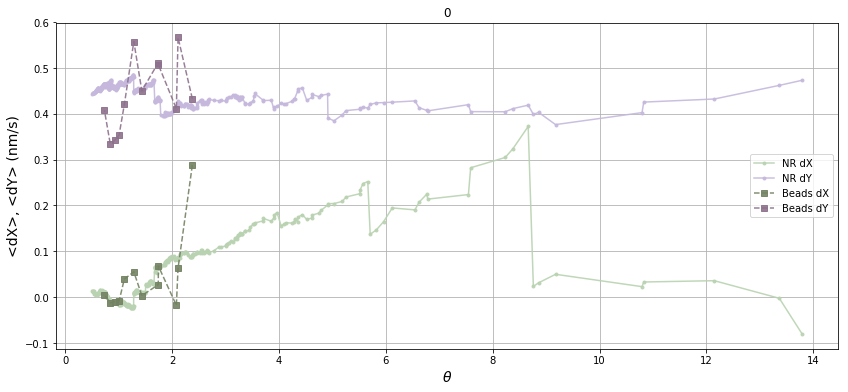

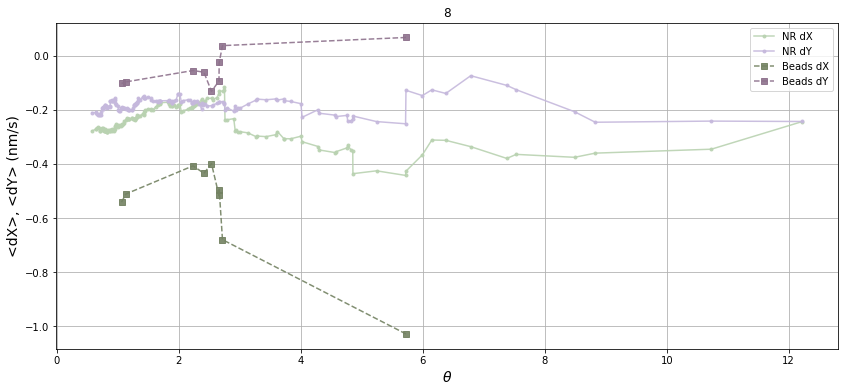

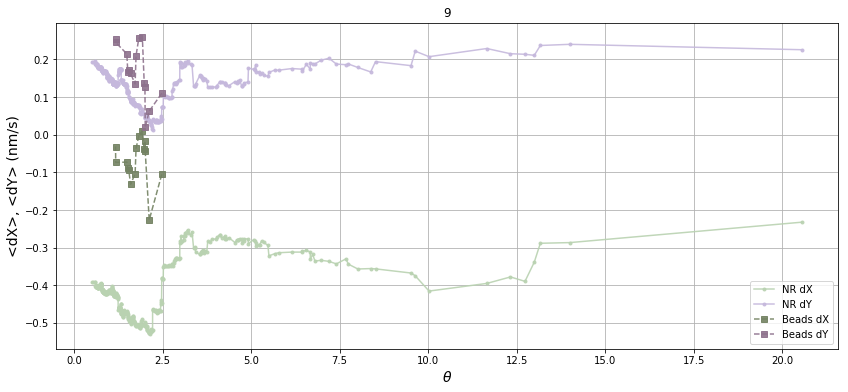

In [27]:
ddt = driftNR*1.0

rc('axes', prop_cycle=(cycler('color',["#b9d2b1","#c5b8dc","#738262",
"#8d718c"])))
    
pxfr = 325/ 10e-3 # scale pixel per frame
ids = []
for i,ni in enumerate([0,8,9]):
    sx,sy = stNRs[i]
    sx,sy = (sx*1,sy*1)
    xt = 1.0*ddt[ddt[:,-1]==ni,:]
    idx = arange(xt.shape[0])
    mx = xt[isfinite(xt[:,0])].mean(axis=0)
    ids.append(idx[(abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy)*(xt[:,3]<0.1)*(xt[:,4]<0.1)])
    xt = xt[(abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy),:]
    xt = xt[(xt[:,3]<0.1)*(xt[:,4]<0.1),:]
    idx = 1+arange(xt.shape[0])
    xt = xt[(-xt[:,5]).argsort(),:]
    amp = 1.0*xt[:,5]
    xt = xt.cumsum(axis=0)
    xt = (xt.transpose()/idx).transpose()
    figure(i,figsize=(14,6))
    plot(amp,xt[:,0]*pxfr,'.-',label="NR dX",alpha=0.9)
    plot(amp,xt[:,1]*pxfr,'.-',label="NR dY",alpha=0.9)
    ylabel("<dX>, <dY> (nm/s)",fontsize=14)
    xlabel("$\\theta$",fontsize=14)
    grid()
    #ylim(-.0001,0.0001)
    title(ni)
idNR = list(ids)

ddt = driftBeads*1.0
ids = []
for ni in range(3):
    sx,sy = stBeads[ni]
    sx,sy = (sx*1.0,sy*1.0)
    xt = 1.0*ddt[ddt[:,-1]==ni,:]
    idx = arange(xt.shape[0])
    mx = xt[isfinite(xt[:,0])].mean(axis=0)
    ids.append(idx[(abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy)*(xt[:,3]<0.1)*(xt[:,4]<0.1)])
    xt = xt[(abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy),:]
    xt = xt[(xt[:,3]<0.1)*(xt[:,4]<0.1),:]
    
    idx = 1+arange(xt.shape[0])
    xt = xt[(-xt[:,5]).argsort(),:]
    amp = 1.0*xt[:,5]
    xt = xt.cumsum(axis=0)
    xt = (xt.transpose()/idx).transpose()
    figure(ni)
    plot(amp,xt[:,0]*pxfr,'s--',label="Beads dX",alpha=0.9)
    plot(amp,xt[:,1]*pxfr,'s--',label="Beads dY",alpha=0.9)
    legend()
    savefig("NanoRodsvsBeads_drift"+str(ni)+"N2s.png")
#ylim(-.5,0.7)
idB = list(ids)

legend()
rc('axes', prop_cycle=(cycler('color',['#377eb8','#ff7f00','#4daf4a','#e41a1c','#984ea3','#ffff33','#a65628','#f781bf','#999999'])))


In [28]:
mean(drifts[0][0]),mean(drifts[0][1])

(-1.2005090799478944e-05, -5.503929915327952e-06)

In [29]:
mean(drifts[1][0]),mean(drifts[1][1])

(-4.966435489420348e-06, 2.154712048991104e-05)

In [30]:
mean(drifts[2][0]),mean(drifts[2][1])

(4.374355569373549e-05, 1.2626083887177136e-05)

In [31]:
cmapgnu = get_cmap("gnuplot")


In [32]:
def plot_trajectory(x,y,trace=True, fig = None, ax = None):
    ts = arange(x.shape[0])
    tsr = ts*10e-3
        
        
    mex = mean(x); sdx = std(x)
    xlims =[ floor(10*(mex-2*sdx)*.98)/10.0,ceil(10*(mex+2*sdx)*1.02)/10.0]
    mey = mean(y); sdy = std(y)

    ylims =[ floor(10*(mey-2*sdy)*.98)/10.0,ceil(10.0*(mey+2*sdy)*1.02)/10.0]
    
    npixelx = floor(xlims[1]-xlims[0])+1
    npixely = floor(ylims[1]-ylims[0])+1
    npixell = max(npixelx,npixely)
    npixelx = npixell
    npixely = npixell
    xwdthleft = npixelx-(xlims[1]-xlims[0])
    ywdthleft = npixely-(ylims[1]-ylims[0])
    xlims[0] = xlims[0]-xwdthleft/2.0
    xlims[1] = xlims[1]+xwdthleft/2.0
    ylims[0] = ylims[0]-ywdthleft/2.0
    ylims[1] = ylims[1]+ywdthleft/2.0
    
    scdiv = 325/20.0

    nf = 50
    ns = 50
    k = len(x)
    xm = running_mean(x,ns)
    ym = running_mean(y,ns)
    
    if ax is None:
        ax = plt.gca()
    #ax = fig.add_subplot(111)
    sc = ax.scatter(x,y,c=tsr,cmap=cmapgnu,alpha=0.5)
    ax.set_xlim(xlims[0],xlims[1])
    ax.set_ylim(ylims[0],ylims[1])
    ax.axis('off')
    ax.plot([xlims[1]*0.99-1.0/scdiv,xlims[1]*0.99],[ylims[0]*1.01,ylims[0]*1.01],'k-',linewidth=2.0)
    ax.text(xlims[1]*0.99-.70/scdiv,ylims[0]*1.013,"20nm")
    sc.set_clim(0,len(x)*10e-3)
    #axc = colorbar()
    #axc.set_label("t(s)")
    ax.set_xlabel("pixel")
    ax.set_ylabel("pixel")
    #ax.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
    #    hspace = 0, wspace = 0)
    #ax.margins(0,0)
    #gca().xaxis.set_major_locator(NullLocator())
    #gca().yaxis.set_major_locator(NullLocator())
    #fig.patch.set_facecolor((.4,.4,.4))
    if trace:
        ax.plot(xm,ym,'-',c='C0',alpha=0.7)
    

In [57]:
#plot_trajectories(permutation(idB[0])[:6],fullp,nrows = 2,ncols=3 ,figsize = (18,0))
def plot_trajectories(ids,fullp,trace=True,nrows = 2,ncols=3 ,figsize = (18,0)):

    fig, axs = subplots(nrows=nrows,ncols=ncols,figsize=figsize)
    for k,i in enumerate(ids):
        ax = axs[k//3,k%3]
        x = fullp[i,:,5]
        y = fullp[i,:,6]
        ts = arange(x.shape[0])
        tsr = ts*10e-3


        mex = mean(x); sdx = std(x)
        xlims =[ floor(10*(mex-2*sdx)*.98)/10.0,ceil(10*(mex+2*sdx)*1.02)/10.0]
        mey = mean(y); sdy = std(y)

        ylims =[ floor(10*(mey-2*sdy)*.98)/10.0,ceil(10.0*(mey+2*sdy)*1.02)/10.0]

        npixelx = floor(xlims[1]-xlims[0])+1
        npixely = floor(ylims[1]-ylims[0])+1
        npixell = max(npixelx,npixely)
        npixelx = npixell
        npixely = npixell
        xwdthleft = npixelx-(xlims[1]-xlims[0])
        ywdthleft = npixely-(ylims[1]-ylims[0])
        xlims[0] = xlims[0]-xwdthleft/2.0
        xlims[1] = xlims[1]+xwdthleft/2.0
        ylims[0] = ylims[0]-ywdthleft/2.0
        ylims[1] = ylims[1]+ywdthleft/2.0

        scdiv = 325/20.0

        nf = 50
        ns = 50
        k = len(x)
        xm = running_mean(x,ns)
        ym = running_mean(y,ns)

        #ax = fig.add_subplot(111)
        #print(x.shape,y.shape,tsr.shape)
        sc = ax.scatter(x,y,c=tsr,cmap=cmapgnu,alpha=0.5)
        ax.set_xlim(xlims[0],xlims[1])
        ax.set_ylim(ylims[0],ylims[1])
        ax.axis('off')
        ax.plot([xlims[1]*0.99-1.0/scdiv,xlims[1]*0.99],[ylims[0]*1.01,ylims[0]*1.01],'k-',linewidth=2.0)
        ax.text(xlims[1]*0.99-.70/scdiv,ylims[0]*1.013,"20nm")
        sc.set_clim(0,len(x)*10e-3)
        #axc = colorbar()
        #axc.set_label("t(s)")
        ax.set_xlabel("pixel")
        ax.set_ylabel("pixel")
        subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
        ax.margins(0,0)
        ax.text((xlims[0]+xlims[1])*.5,ylims[1]-(ylims[1]-ylims[0])*.05,"Bead "+str(i),fontsize=14)
        ax.plot(xm,ym,'-',c='C0',alpha=0.7)
        
plot_trajectories(permutation(idB[0])[:6],fullp,nrows = 2,ncols=3 ,figsize = (18,0))

TypeError: 'int' object is not subscriptable

RuntimeError: libpng signaled error

<Figure size 1296x0 with 6 Axes>

In [58]:
id6+1*(len(idx)%6!=0)

2

In [59]:
beadp[0][0].shape

(6000, 8)

In [60]:
fullp = array(beadp[0])


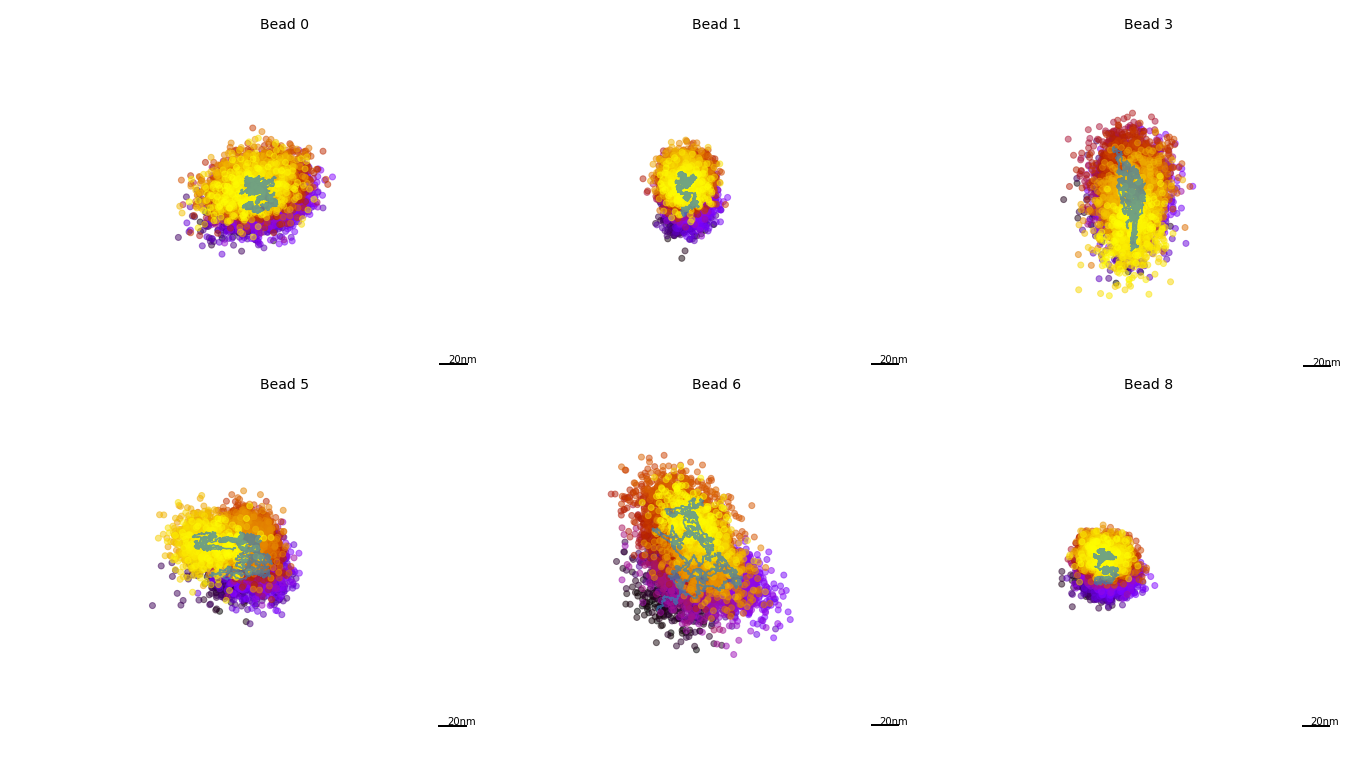

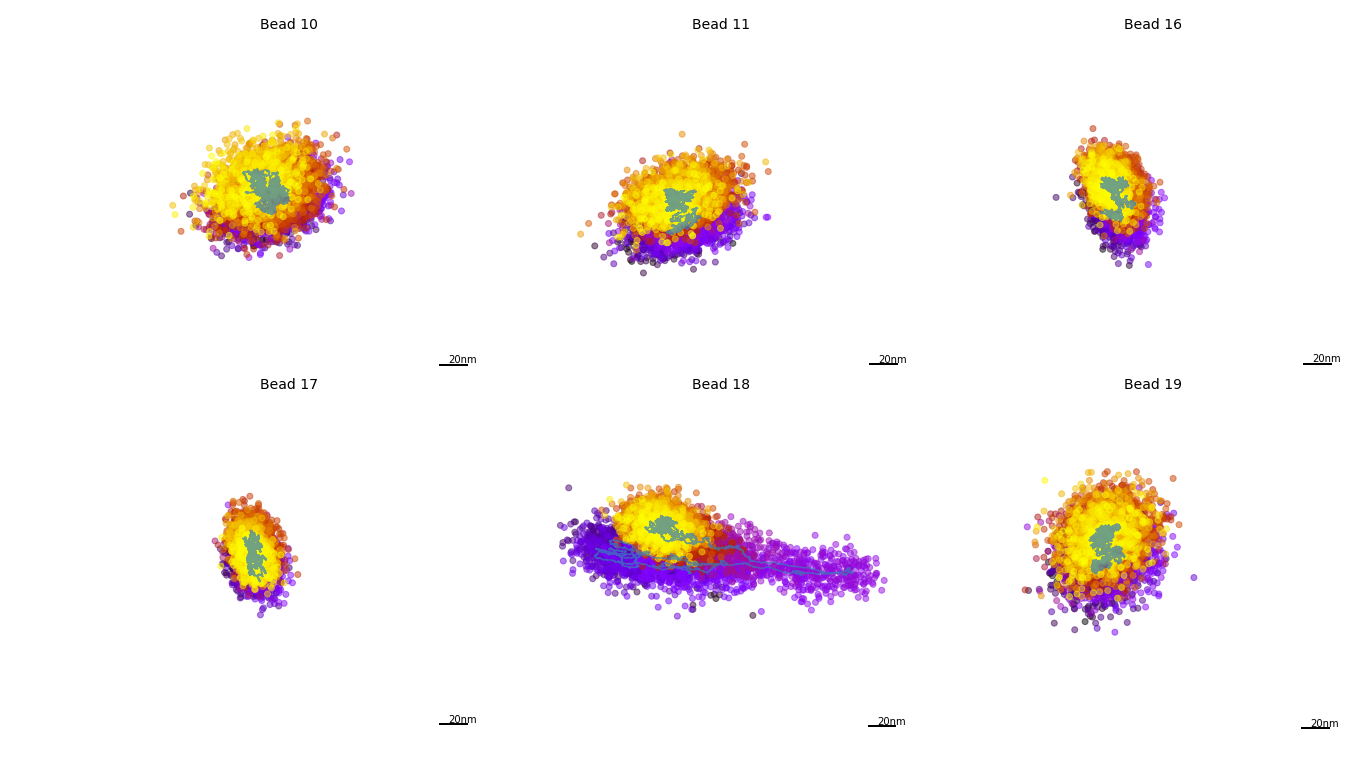

In [61]:
ids = idB[0]*1
fullp = beadp[0]

id6 = (len(ids)-1)//6
for i6 in range(id6+1*(len(idx)%6!=0)):
    fig, axs = subplots(nrows=2,ncols=3,figsize=(18,10))

    for k,i in enumerate(ids[(6*i6):(6*i6+6)]):
        ax = axs[k//3,k%3]
        x = fullp[i,:,5]
        y = fullp[i,:,6]
        ts = arange(x.shape[0])
        tsr = ts*10e-3


        mex = mean(x); sdx = std(x)
        xlims =[ floor(10*(mex-2*sdx)*.98)/10.0,ceil(10*(mex+2*sdx)*1.02)/10.0]
        mey = mean(y); sdy = std(y)

        ylims =[ floor(10*(mey-2*sdy)*.98)/10.0,ceil(10.0*(mey+2*sdy)*1.02)/10.0]

        npixelx = floor(xlims[1]-xlims[0])+1
        npixely = floor(ylims[1]-ylims[0])+1
        npixell = max(npixelx,npixely)
        npixelx = npixell
        npixely = npixell
        xwdthleft = npixelx-(xlims[1]-xlims[0])
        ywdthleft = npixely-(ylims[1]-ylims[0])
        xlims[0] = xlims[0]-xwdthleft/2.0
        xlims[1] = xlims[1]+xwdthleft/2.0
        ylims[0] = ylims[0]-ywdthleft/2.0
        ylims[1] = ylims[1]+ywdthleft/2.0

        scdiv = 325/20.0

        nf = 50
        ns = 50
        k = len(x)
        xm = running_mean(x,ns)
        ym = running_mean(y,ns)

        #ax = fig.add_subplot(111)
        #print(x.shape,y.shape,tsr.shape)
        sc = ax.scatter(x,y,c=tsr,cmap=cmapgnu,alpha=0.5)
        ax.set_xlim(xlims[0],xlims[1])
        ax.set_ylim(ylims[0],ylims[1])
        ax.axis('off')
        ax.plot([xlims[1]*0.99-1.0/scdiv,xlims[1]*0.99],[ylims[0]*1.01,ylims[0]*1.01],'k-',linewidth=2.0)
        ax.text(xlims[1]*0.99-.70/scdiv,ylims[0]*1.013,"20nm")
        sc.set_clim(0,len(x)*10e-3)
        #axc = colorbar()
        #axc.set_label("t(s)")
        ax.set_xlabel("pixel")
        ax.set_ylabel("pixel")
        subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
        ax.margins(0,0)
        ax.text((xlims[0]+xlims[1])*.5,ylims[1]-(ylims[1]-ylims[0])*.05,"Bead "+str(i),fontsize=14)
        ax.plot(xm,ym,'-',c='C0',alpha=0.7)

9


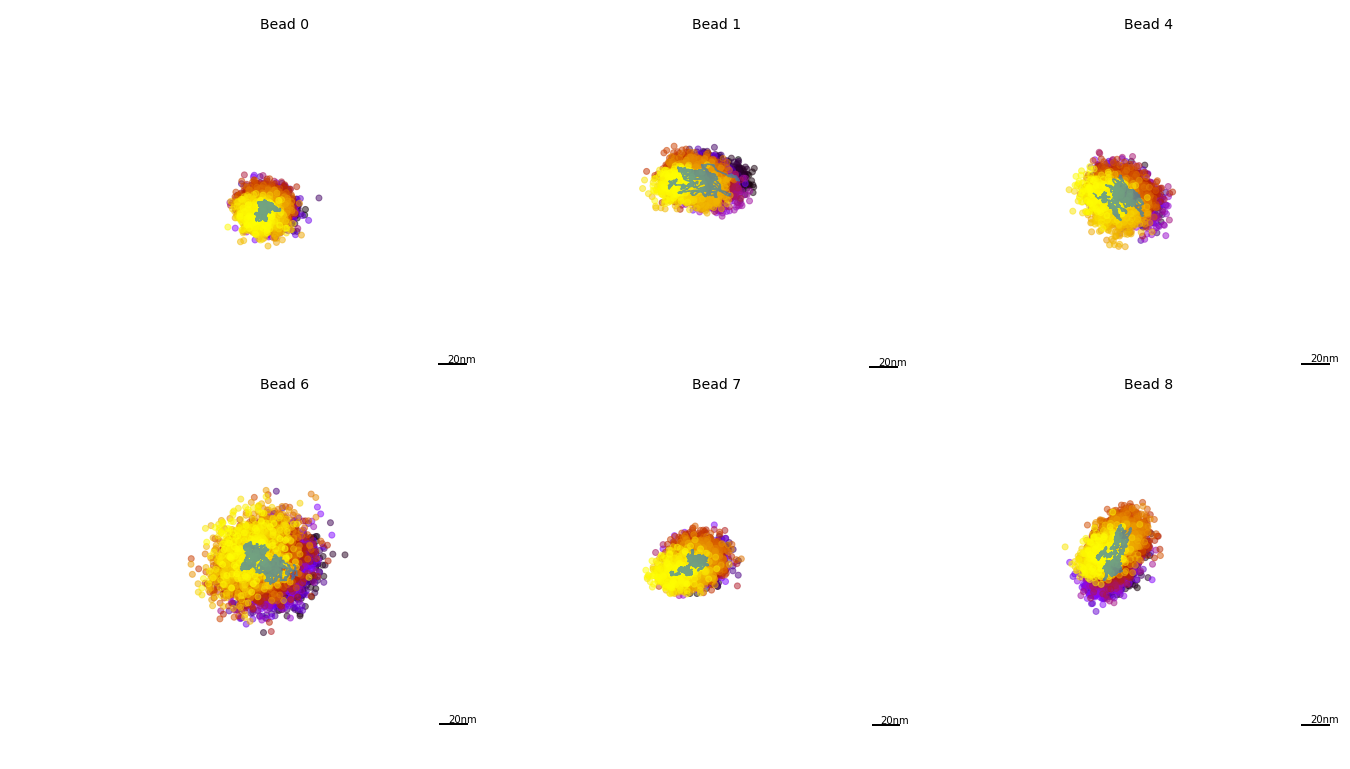

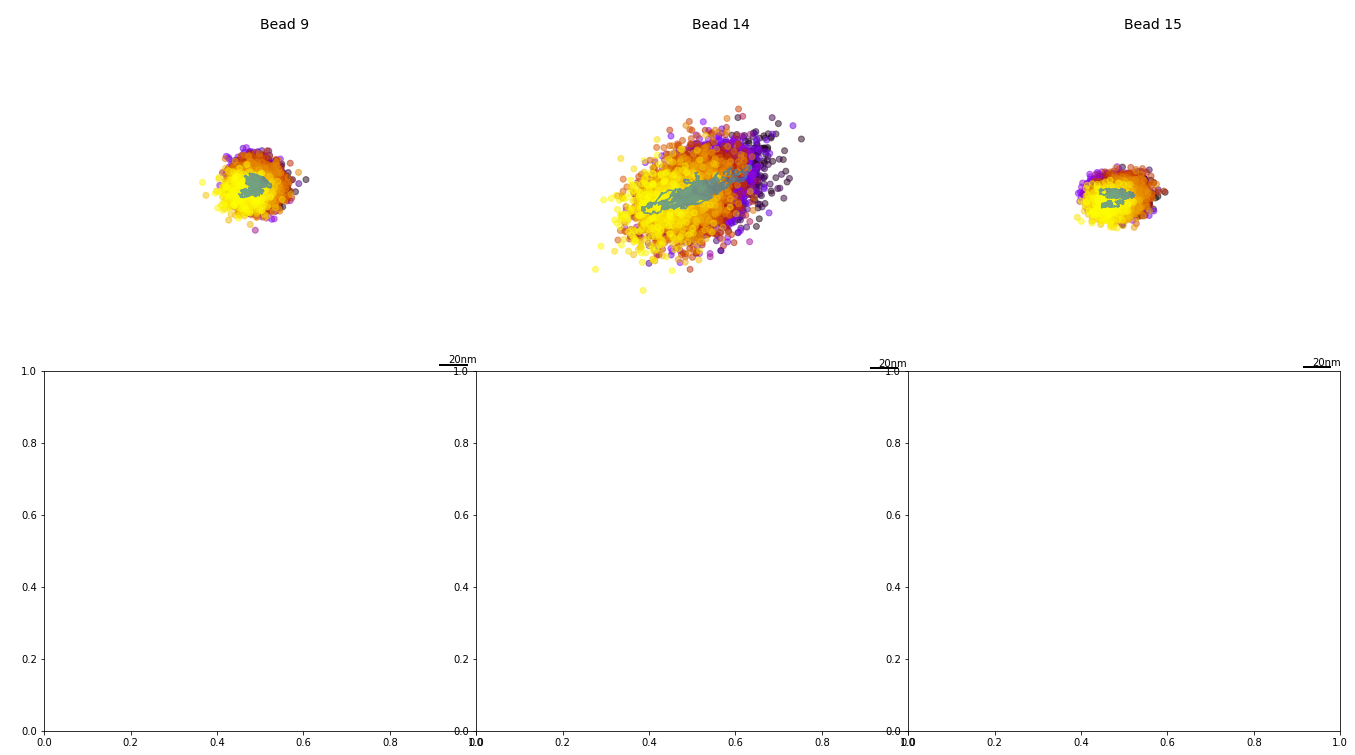

In [62]:
ids = idB[1]*1
fullp = beadp[1]

id6 = (len(ids)-1)//6
print(len(ids))
for i6 in range(id6+1*(len(idx)%6!=0)):
    fig, axs = subplots(nrows=2,ncols=3,figsize=(18,10))

    for k,i in enumerate(ids[(6*i6):(6*i6+6)]):
        ax = axs[k//3,k%3]
        x = fullp[i,:,5]
        y = fullp[i,:,6]
        ts = arange(x.shape[0])
        tsr = ts*10e-3


        mex = mean(x); sdx = std(x)
        xlims =[ floor(10*(mex-2*sdx)*.98)/10.0,ceil(10*(mex+2*sdx)*1.02)/10.0]
        mey = mean(y); sdy = std(y)

        ylims =[ floor(10*(mey-2*sdy)*.98)/10.0,ceil(10.0*(mey+2*sdy)*1.02)/10.0]

        npixelx = floor(xlims[1]-xlims[0])+1
        npixely = floor(ylims[1]-ylims[0])+1
        npixell = max(npixelx,npixely)
        npixelx = npixell
        npixely = npixell
        xwdthleft = npixelx-(xlims[1]-xlims[0])
        ywdthleft = npixely-(ylims[1]-ylims[0])
        xlims[0] = xlims[0]-xwdthleft/2.0
        xlims[1] = xlims[1]+xwdthleft/2.0
        ylims[0] = ylims[0]-ywdthleft/2.0
        ylims[1] = ylims[1]+ywdthleft/2.0

        scdiv = 325/20.0

        nf = 50
        ns = 50
        k = len(x)
        xm = running_mean(x,ns)
        ym = running_mean(y,ns)

        #ax = fig.add_subplot(111)
        #print(x.shape,y.shape,tsr.shape)
        sc = ax.scatter(x,y,c=tsr,cmap=cmapgnu,alpha=0.5)
        ax.set_xlim(xlims[0],xlims[1])
        ax.set_ylim(ylims[0],ylims[1])
        ax.axis('off')
        ax.plot([xlims[1]*0.99-1.0/scdiv,xlims[1]*0.99],[ylims[0]*1.01,ylims[0]*1.01],'k-',linewidth=2.0)
        ax.text(xlims[1]*0.99-.70/scdiv,ylims[0]*1.013,"20nm")
        sc.set_clim(0,len(x)*10e-3)
        #axc = colorbar()
        #axc.set_label("t(s)")
        ax.set_xlabel("pixel")
        ax.set_ylabel("pixel")
        subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
        ax.margins(0,0)
        ax.text((xlims[0]+xlims[1])*.5,ylims[1]-(ylims[1]-ylims[0])*.05,"Bead "+str(i),fontsize=14)
        ax.plot(xm,ym,'-',c='C0',alpha=0.7)

In [63]:
stBeads

array([[1.44742127e-04, 4.16668232e-04],
       [3.83995602e-05, 4.53456218e-05],
       [3.10740608e-05, 2.83670027e-05]])

15


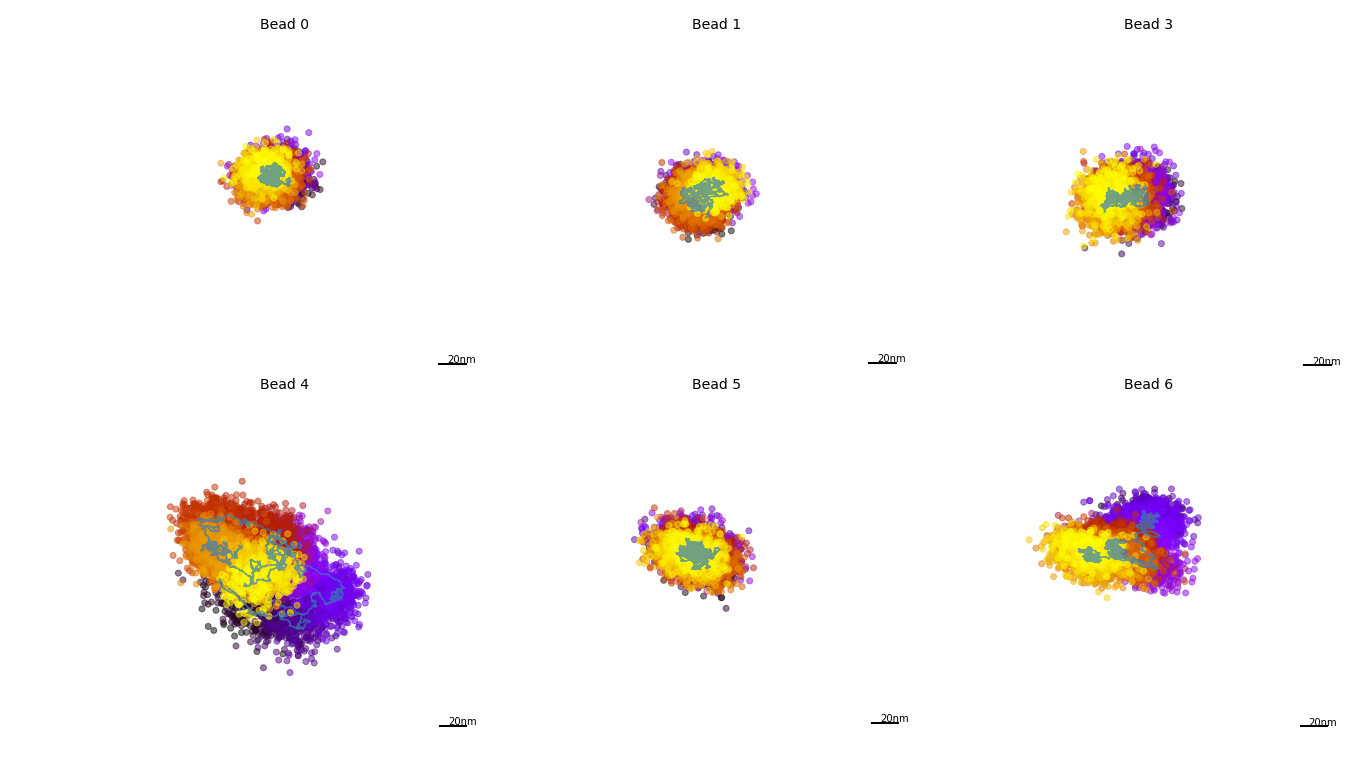

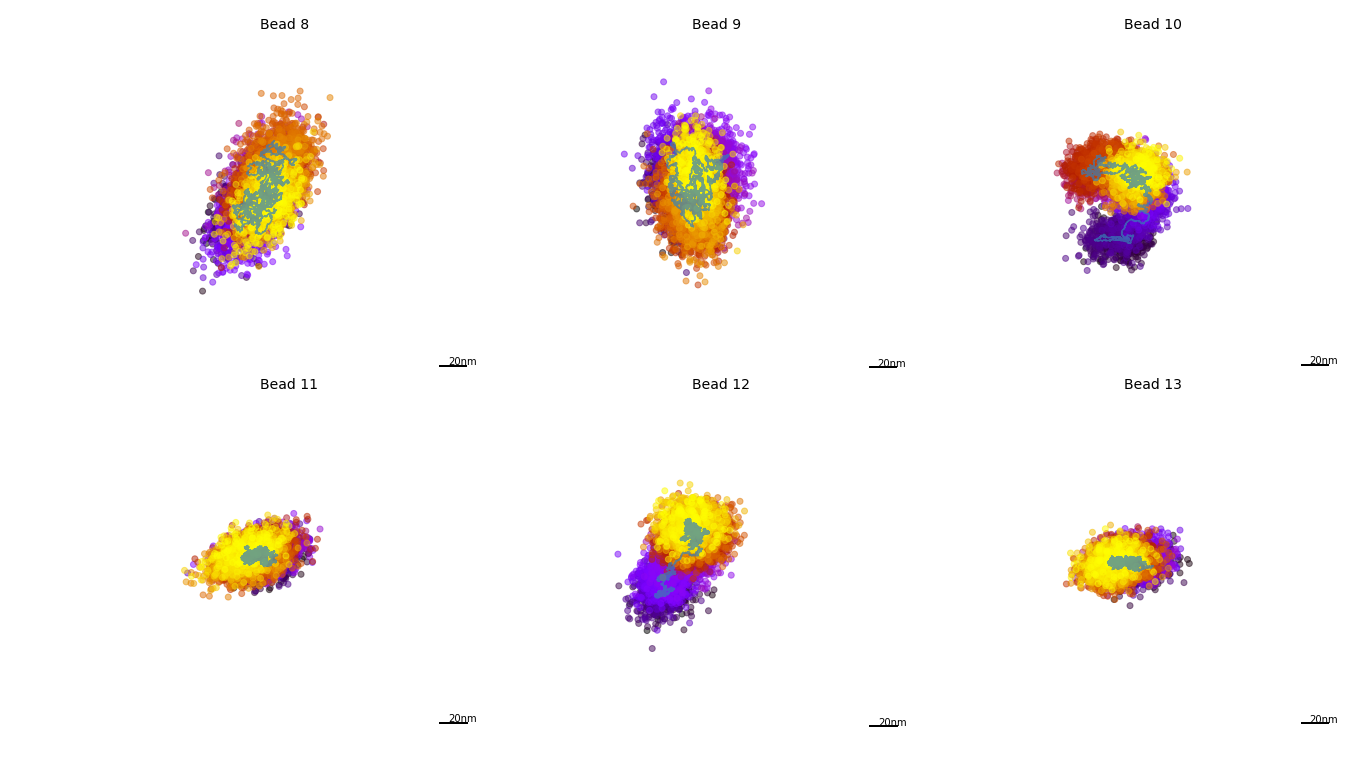

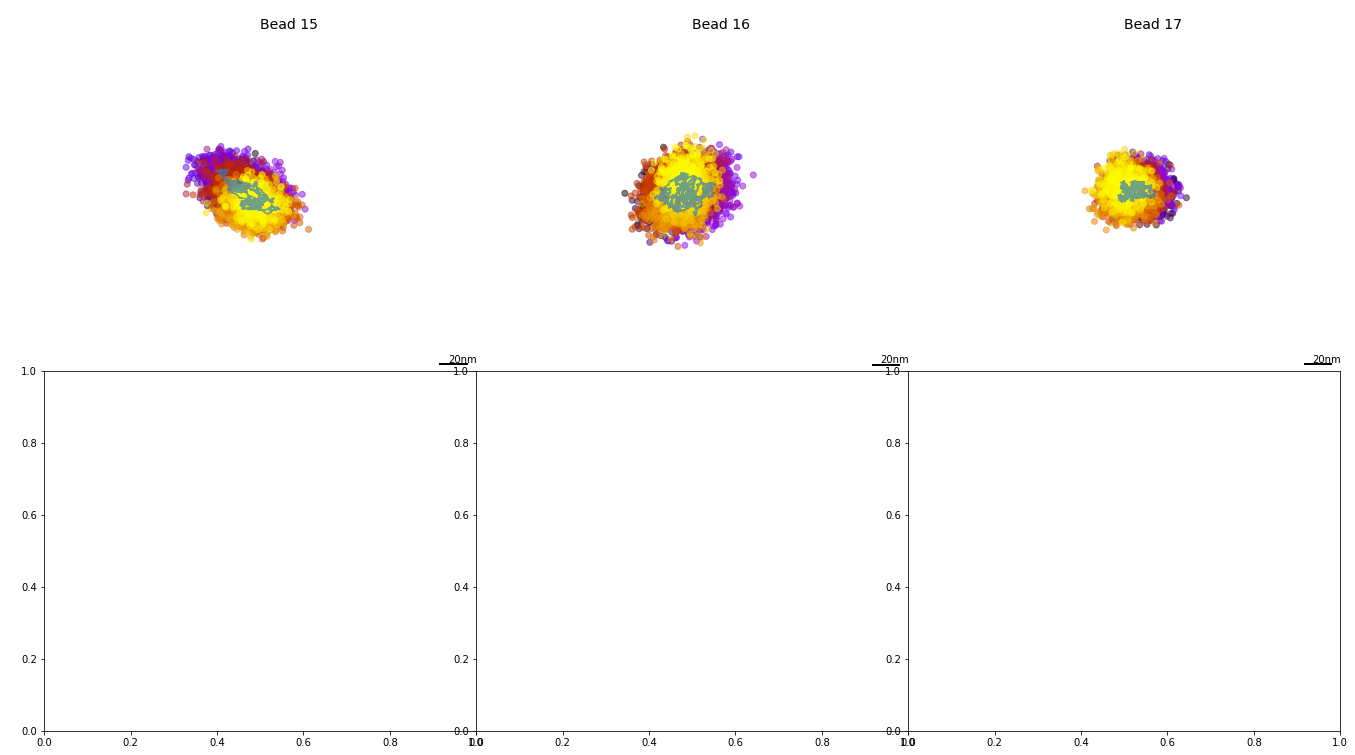

In [64]:
ids = idB[2]*1
fullp = beadp[2]

id6 = (len(ids)-1)//6
print(len(ids))
for i6 in range(id6+1*(len(idx)%6!=0)):
    fig, axs = subplots(nrows=2,ncols=3,figsize=(18,10))

    for k,i in enumerate(ids[(6*i6):(6*i6+6)]):
        ax = axs[k//3,k%3]
        x = fullp[i,:,5]
        y = fullp[i,:,6]
        ts = arange(x.shape[0])
        tsr = ts*10e-3


        mex = mean(x); sdx = std(x)
        xlims =[ floor(10*(mex-2*sdx)*.98)/10.0,ceil(10*(mex+2*sdx)*1.02)/10.0]
        mey = mean(y); sdy = std(y)

        ylims =[ floor(10*(mey-2*sdy)*.98)/10.0,ceil(10.0*(mey+2*sdy)*1.02)/10.0]

        npixelx = floor(xlims[1]-xlims[0])+1
        npixely = floor(ylims[1]-ylims[0])+1
        npixell = max(npixelx,npixely)
        npixelx = npixell
        npixely = npixell
        xwdthleft = npixelx-(xlims[1]-xlims[0])
        ywdthleft = npixely-(ylims[1]-ylims[0])
        xlims[0] = xlims[0]-xwdthleft/2.0
        xlims[1] = xlims[1]+xwdthleft/2.0
        ylims[0] = ylims[0]-ywdthleft/2.0
        ylims[1] = ylims[1]+ywdthleft/2.0

        scdiv = 325/20.0

        nf = 50
        ns = 50
        k = len(x)
        xm = running_mean(x,ns)
        ym = running_mean(y,ns)

        #ax = fig.add_subplot(111)
        #print(x.shape,y.shape,tsr.shape)
        sc = ax.scatter(x,y,c=tsr,cmap=cmapgnu,alpha=0.5)
        ax.set_xlim(xlims[0],xlims[1])
        ax.set_ylim(ylims[0],ylims[1])
        ax.axis('off')
        ax.plot([xlims[1]*0.99-1.0/scdiv,xlims[1]*0.99],[ylims[0]*1.01,ylims[0]*1.01],'k-',linewidth=2.0)
        ax.text(xlims[1]*0.99-.70/scdiv,ylims[0]*1.013,"20nm")
        sc.set_clim(0,len(x)*10e-3)
        #axc = colorbar()
        #axc.set_label("t(s)")
        ax.set_xlabel("pixel")
        ax.set_ylabel("pixel")
        subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
        ax.margins(0,0)
        ax.text((xlims[0]+xlims[1])*.5,ylims[1]-(ylims[1]-ylims[0])*.05,"Bead "+str(i),fontsize=14)
        ax.plot(xm,ym,'-',c='C0',alpha=0.7)

In [65]:
nwdirsB

['/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell10_11output/sptrack/',
 '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell8_9output/sptrack/',
 '/mnt/data/Anastasia/19_02_20_pd15_02_div5_NR_BeRST_MOVILITYONLY/cell9_10output/sptrack/']

In [66]:
idNR

[array([   3,    4,    9,   13,   15,   17,   30,   38,   39,   45,   46,
          50,   57,   58,   62,   63,   72,   74,   76,   79,   85,   94,
          95,  111,  114,  115,  117,  121,  125,  129,  134,  138,  142,
         143,  144,  146,  151,  152,  154,  157,  163,  164,  167,  174,
         175,  178,  183,  186,  195,  199,  213,  218,  225,  226,  231,
         233,  237,  242,  244,  251,  252,  256,  258,  259,  261,  266,
         269,  270,  275,  280,  281,  282,  284,  297,  298,  301,  302,
         308,  309,  311,  313,  314,  315,  316,  317,  318,  320,  323,
         331,  335,  350,  351,  354,  355,  361,  362,  380,  383,  385,
         393,  394,  402,  405,  411,  413,  418,  422,  424,  430,  434,
         436,  447,  455,  458,  460,  474,  478,  480,  487,  492,  498,
         501,  509,  511,  514,  522,  523,  525,  538,  546,  548,  553,
         558,  561,  564,  565,  568,  580,  585,  589,  591,  597,  600,
         604,  629,  630,  651,  652, 

18
18
18


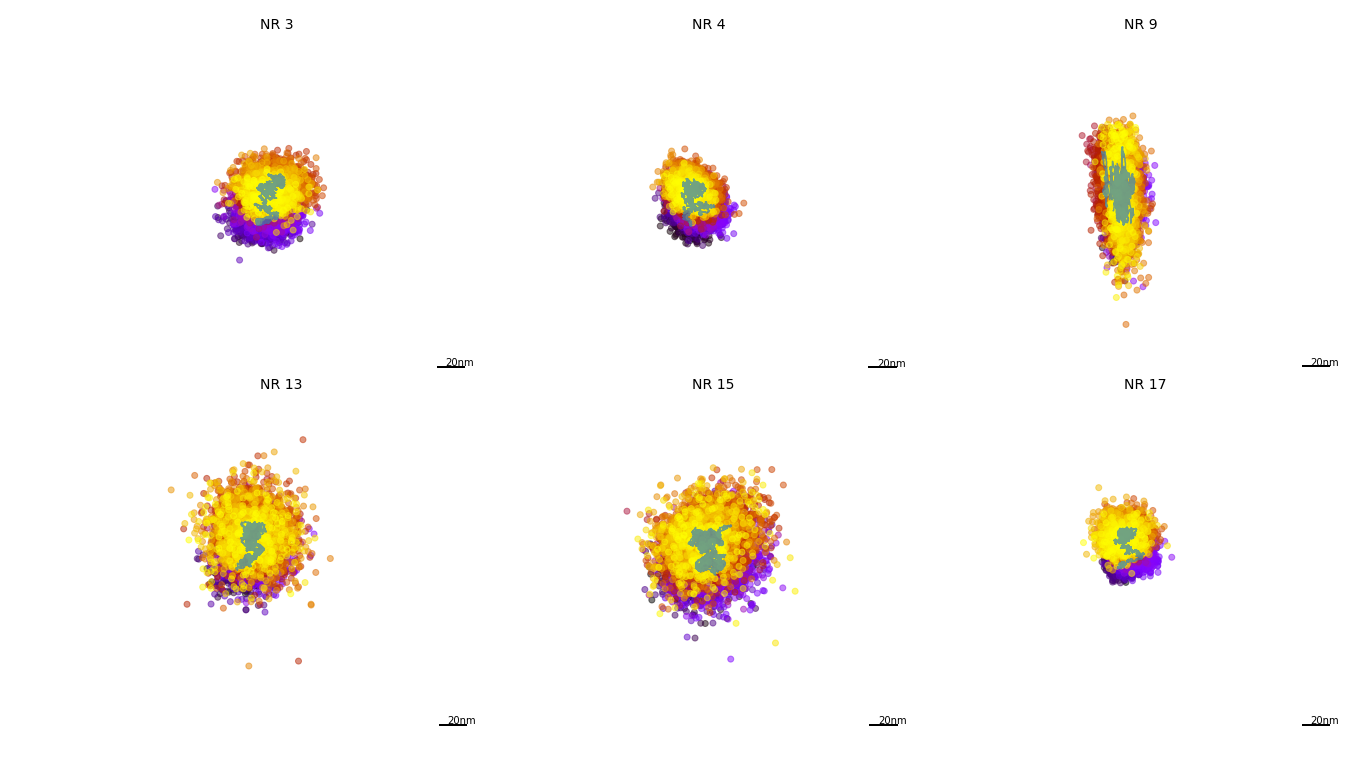

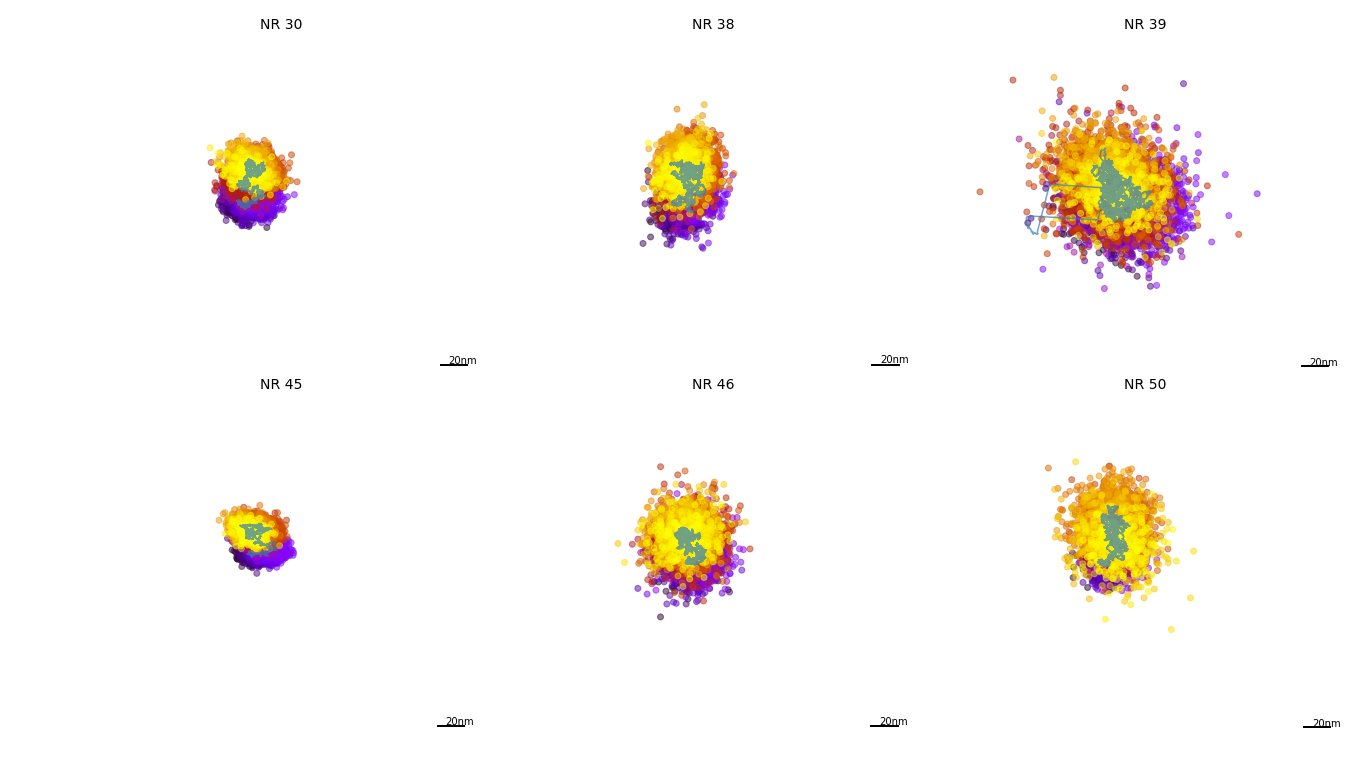

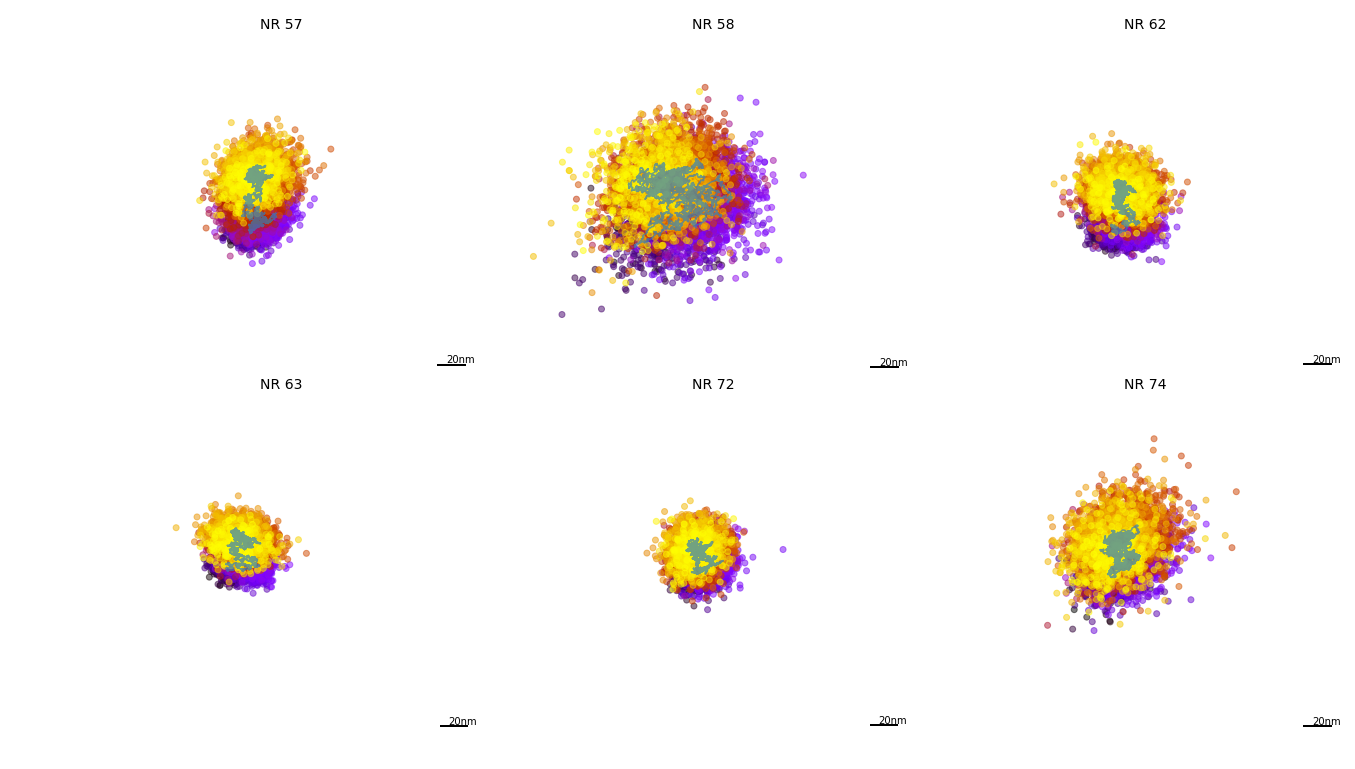

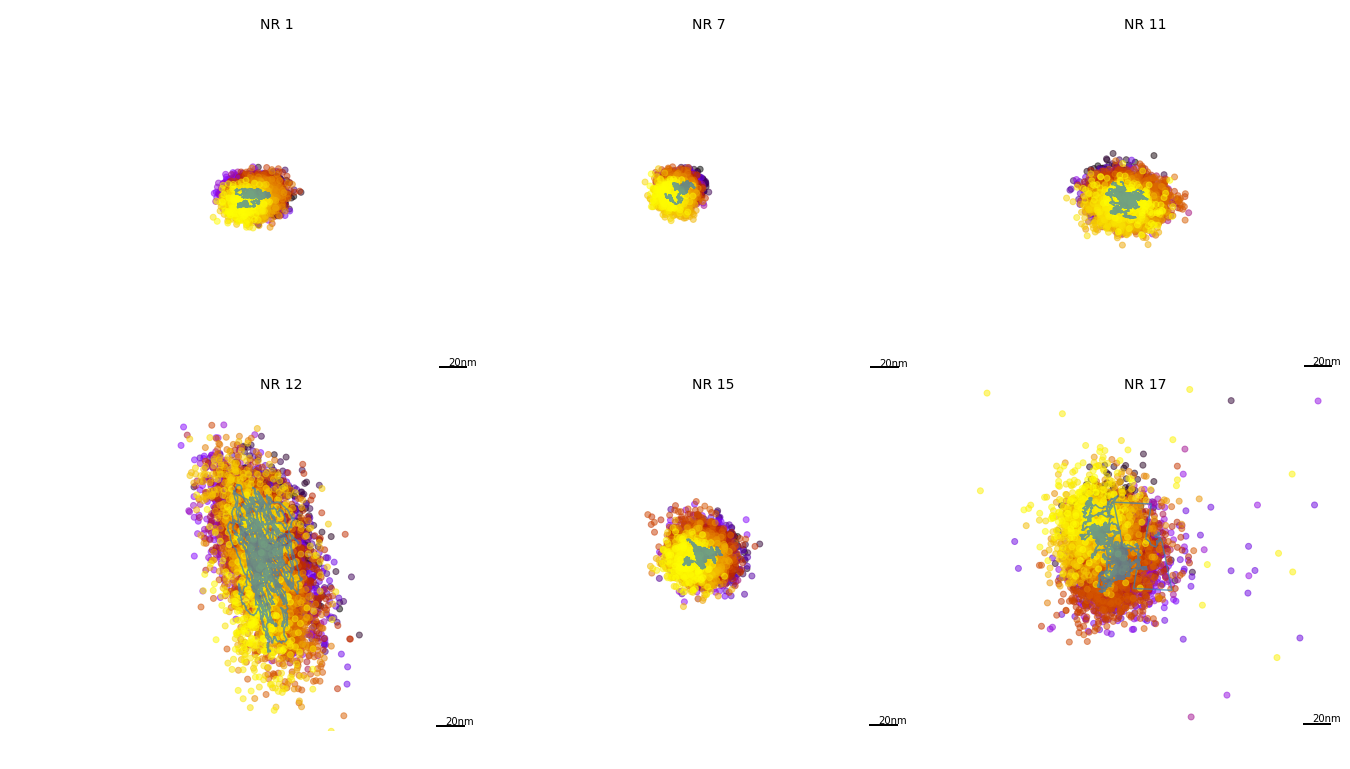

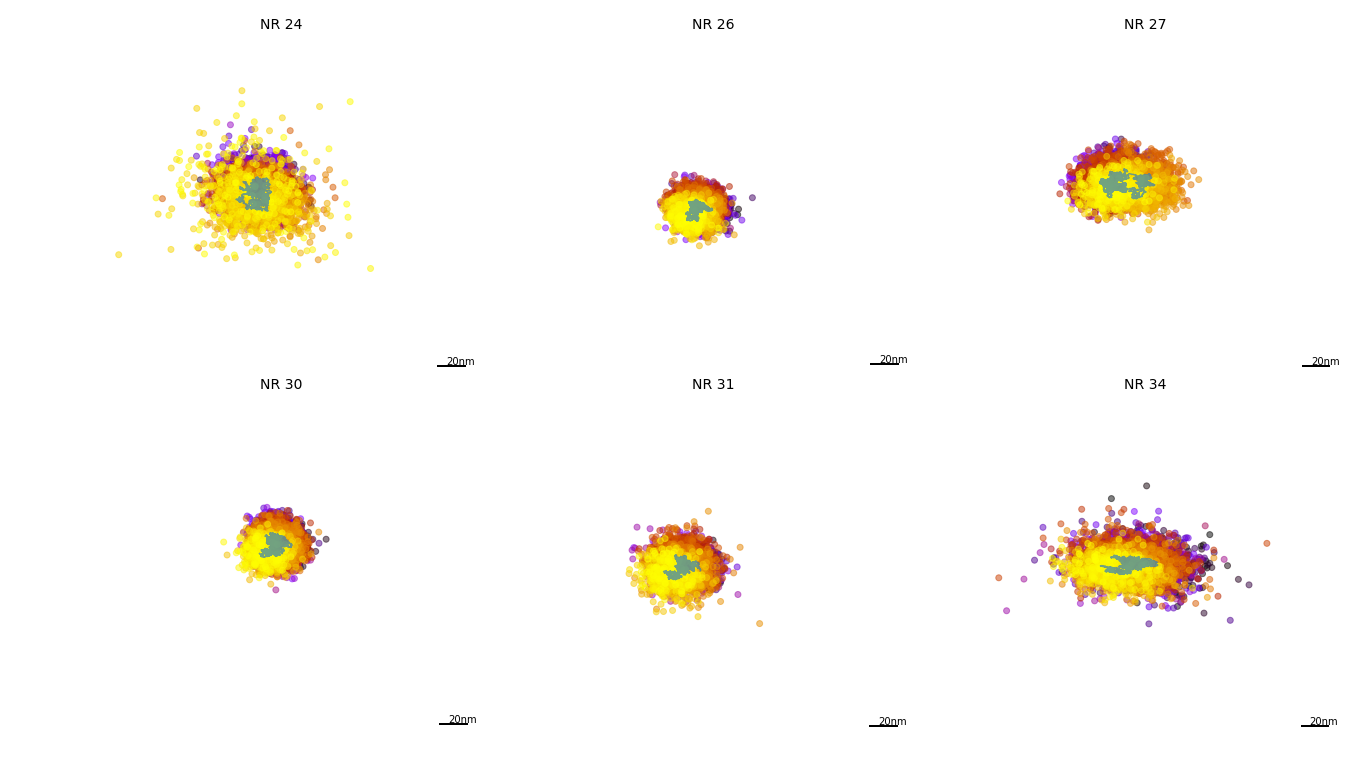

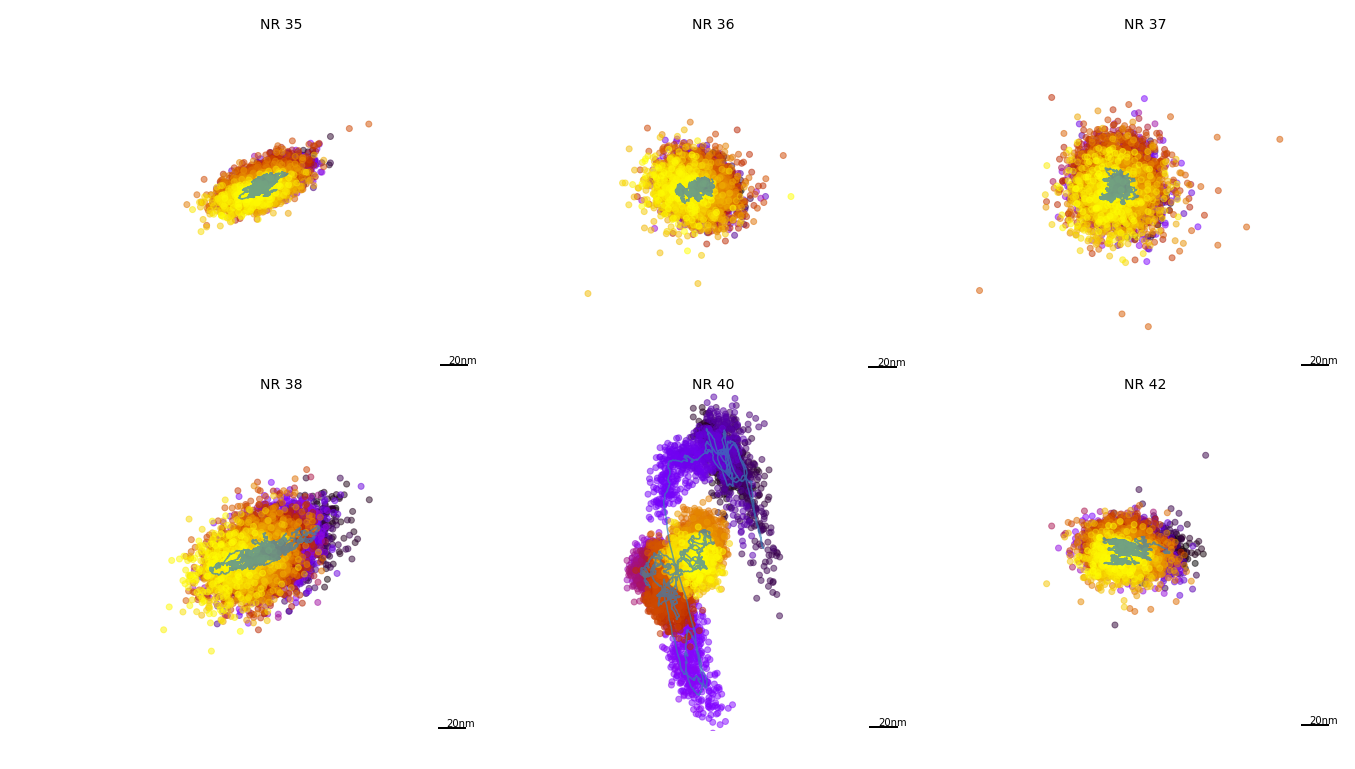

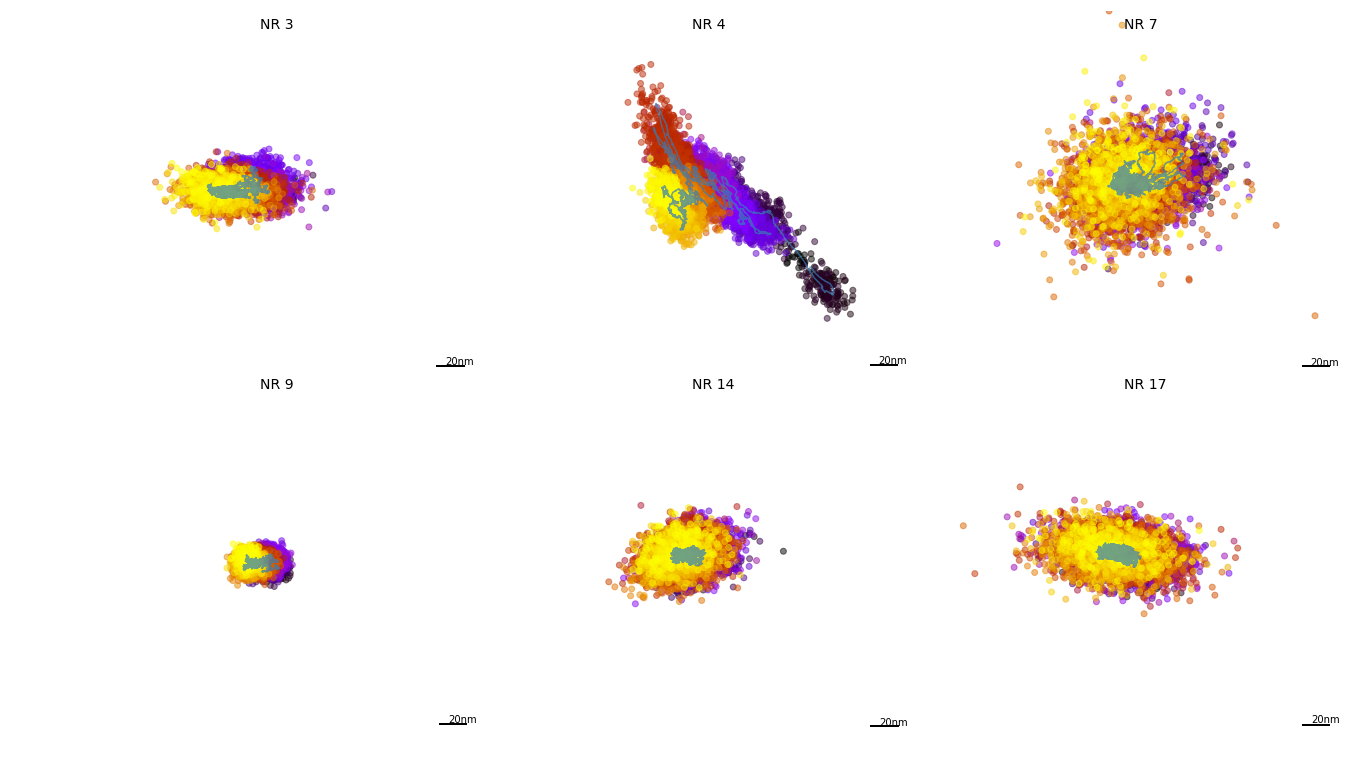

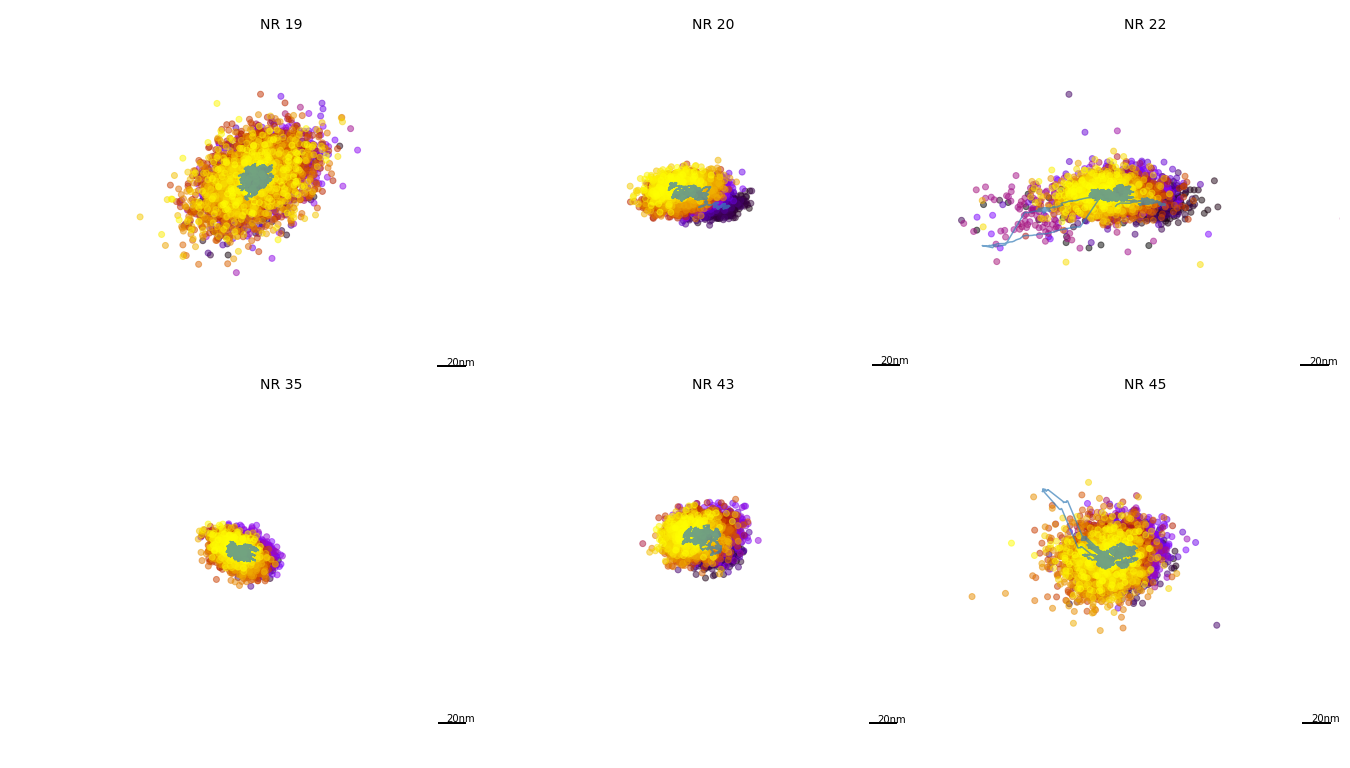

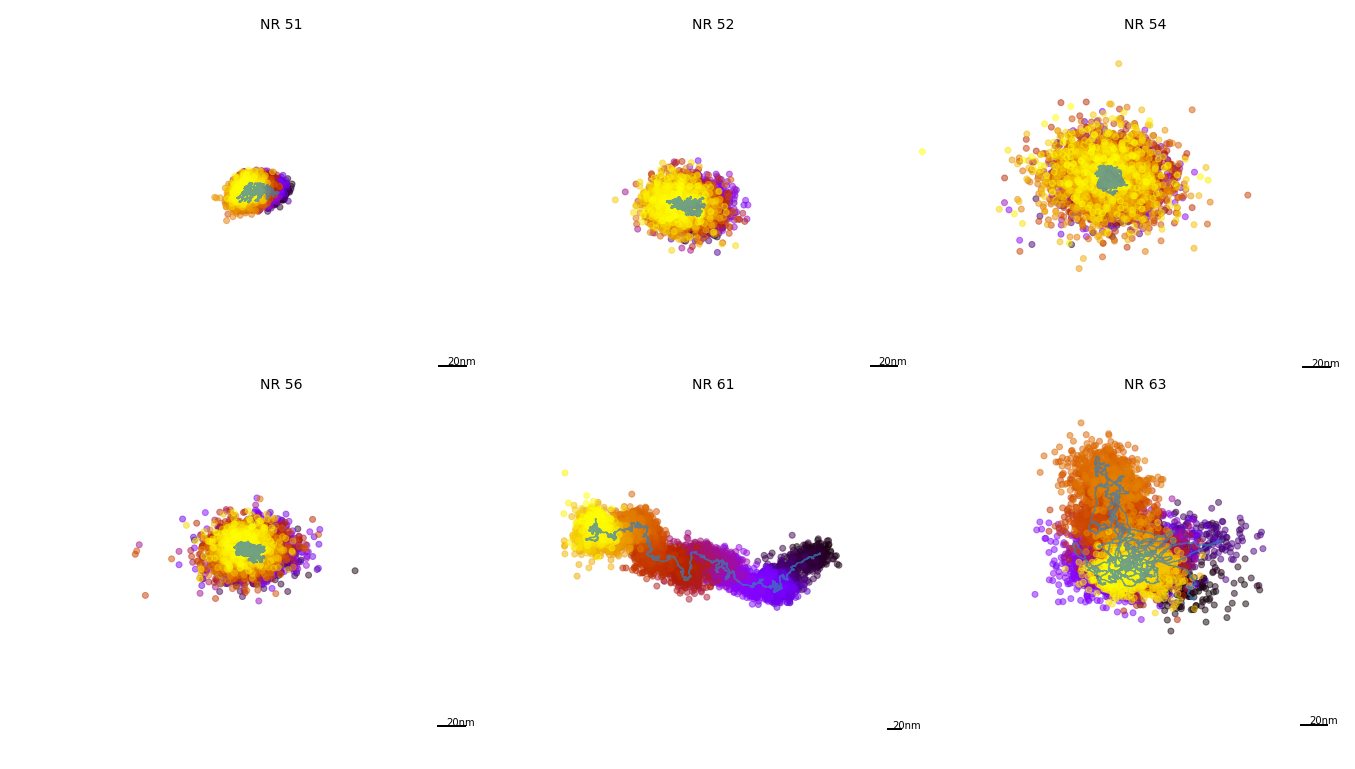

In [67]:
for icell,wdir in enumerate(nwdirsB):
    files = os.listdir(wdir)
    pfiles = []
    for f in files:
        if f[-4:]=='.npy'and f[:4]=='posh' and f[-6:-4]!='DC': pfiles.append(wdir+f)


    ids = (idNR[icell][:18])*1
    id6 = (len(ids)-1)//6
    print(len(ids))
    for i6 in range(min(id6+1*(len(idx)%6!=0),3)):
        fig, axs = subplots(nrows=2,ncols=3,figsize=(18,10))

        for k,i in enumerate(ids[(6*i6):(6*i6+6)]):
            ax = axs[k//3,k%3]
            popts = load(pfiles[i])

            x = popts[:,5]
            y = popts[:,6]
            ts = arange(x.shape[0])
            tsr = ts*10e-3


            mex = mean(x); sdx = std(x)
            xlims =[ floor(10*(mex-2*sdx)*.98)/10.0,ceil(10*(mex+2*sdx)*1.02)/10.0]
            mey = mean(y); sdy = std(y)

            ylims =[ floor(10*(mey-2*sdy)*.98)/10.0,ceil(10.0*(mey+2*sdy)*1.02)/10.0]

            npixelx = floor(xlims[1]-xlims[0])+1
            npixely = floor(ylims[1]-ylims[0])+1
            npixell = max(npixelx,npixely)
            npixelx = npixell
            npixely = npixell
            xwdthleft = npixelx-(xlims[1]-xlims[0])
            ywdthleft = npixely-(ylims[1]-ylims[0])
            xlims[0] = xlims[0]-xwdthleft/2.0
            xlims[1] = xlims[1]+xwdthleft/2.0
            ylims[0] = ylims[0]-ywdthleft/2.0
            ylims[1] = ylims[1]+ywdthleft/2.0

            scdiv = 325/20.0

            nf = 50
            ns = 50
            k = len(x)
            xm = running_mean(x,ns)
            ym = running_mean(y,ns)

            #ax = fig.add_subplot(111)
            #print(x.shape,y.shape,tsr.shape)
            sc = ax.scatter(x,y,c=tsr,cmap=cmapgnu,alpha=0.5)
            ax.set_xlim(xlims[0],xlims[1])
            ax.set_ylim(ylims[0],ylims[1])
            ax.axis('off')
            ax.plot([xlims[1]*0.99-1.0/scdiv,xlims[1]*0.99],[ylims[0]*1.01,ylims[0]*1.01],'k-',linewidth=2.0)
            ax.text(xlims[1]*0.99-.70/scdiv,ylims[0]*1.013,"20nm")
            sc.set_clim(0,len(x)*10e-3)
            #axc = colorbar()
            #axc.set_label("t(s)")
            ax.set_xlabel("pixel")
            ax.set_ylabel("pixel")
            subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
            ax.margins(0,0)
            ax.text((xlims[0]+xlims[1])*.5,ylims[1]-(ylims[1]-ylims[0])*.05,"NR "+str(i),fontsize=14)
            ax.plot(xm,ym,'-',c='C0',alpha=0.7)

# Vector field

In [68]:
from sub.subs import readBigtifFile,selROI,visualization,projectmovie

In [69]:
def visualization(imA,pos=None,widthr=5,heightr=5,contrastd=1.0,contrastu=2.5,figname="",color='red',figsize = (7,4.5)):
    fig = figure(figname,figsize = figsize)
    ax = fig.add_subplot(111)
    imt = imA*1.0; me = mean(imt.flatten()); sd = std(imt.flatten());
    imt[imt>me+contrastu*sd] = me+contrastu*sd; imt[imt<me-contrastd*sd] = me-contrastd*sd;
    ax.imshow(imt,cmap='gray')
    if pos is None:
        pass
    else:
        for a_x, a_y in pos:
            ax.add_patch(Rectangle(xy=(a_x-widthr/2, a_y-heightr/2) ,width=widthr, height=heightr, linewidth=1.5, color=color,alpha=0.95, fill=False))
    axis('off')
    subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    margins(0,0)
    gca().xaxis.set_major_locator(NullLocator())
    gca().yaxis.set_major_locator(NullLocator())

    return((fig,ax))

In [ ]:
cmaporanges = get_cmap("Oranges")
cmappurple = get_cmap("Purples")
cmapprgn = get_cmap("PRGn_r")
cmase = get_cmap("seismic")

In [189]:
def arrowbarcirc(ax,cmap,scalep=1,phi = -pi):
    theta = linspace(0,2*pi,32)
    dx = sin(theta+phi)
    dy = cos(theta+phi)
    x,y = (dx*0,dy*0)
    ax.quiver(x,y,dx,dy,theta,scale = scalep+x*0,cmap=cmap)
    ax.axis('off')
    
#fig,ax = subplots(1,1,figsize=(3,3))
#arrowbarcirc(ax,cmapprgn,scalep=2.5)

In [208]:
ni = 0
i = 0
im = projectmovie(dfileswB[i])

In [209]:
ddt = driftNR*1.0

sx,sy = stNRs[i]
sx,sy = (sx*1,sy*1)
xt = 1.0*ddt[ddt[:,-1]==ni,:]
idx = arange(xt.shape[0])
mx = xt[isfinite(xt[:,0])].mean(axis=0)
sel = (abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy)*(xt[:,3]<0.1)*(xt[:,4]<0.1)
idcs = arange(xt.shape[0])[sel]
idcA = idcs[idcs<posNR[0].shape[0]]
xt = xt[idcA,:]
xt = xt[:,:2]/abs(xt[:,:2]).max(axis=0)
posA = posNR[0][idcA,:]


In [210]:
ddt = driftBeads*1.0

sx,sy = stBeads[i]
sx,sy = (sx*1,sy*1)
xtB = 1.0*ddt[ddt[:,-1]==ni,:]
idx = arange(xt.shape[0])
mx = xtB[isfinite(xtB[:,0])].mean(axis=0)
sel = (abs(xtB[:,0]-mx[0])<sx)*(abs(xtB[:,1]-mx[1])<sy)*(xtB[:,3]<0.1)*(xtB[:,4]<0.1)
idcs = arange(xtB.shape[0])[sel]
idcA = idcs # [idcs<posBeads[0].shape[0]]
xtB = xtB[idcA,:]
xtB = xtB[:,:2]/abs(xtB[:,:2]).max(axis=0)
posB = posBeads[0][idcA,:]

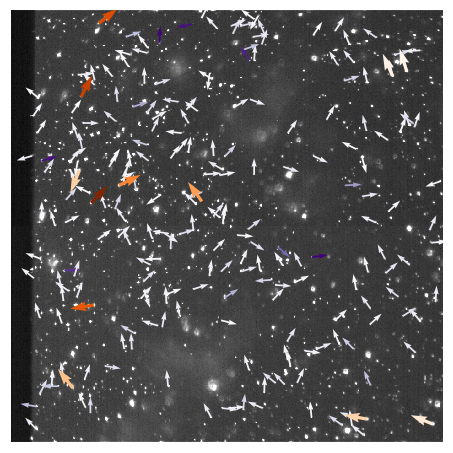

In [211]:
visualization(im[:,:512],figsize=(6,6))
dl = 0.1
ax = gca()
amp = sqrt((xt**2).sum(axis=1))
xxt = (xt.transpose()/amp).transpose()
ax.quiver(posA[:,0],posA[:,1],xxt[:,0]*dl,xxt[:,1]*dl,amp/max(amp),cmap=cmappurple)
amp = sqrt((xtB**2).sum(axis=1))
xxt = (xtB.transpose()/amp).transpose()
ax.quiver(posB[:,0],posB[:,1],xxt[:,0]*dl,xxt[:,1]*dl,amp/max(amp),cmap=cmaporanges)

Text(0.5,1,'Beads')

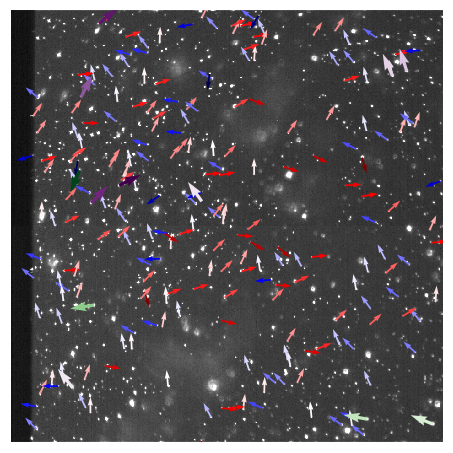

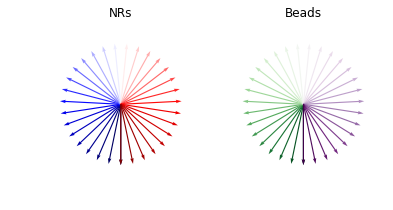

In [212]:
visualization(im[:,:512],figsize=(6,6))
dl = 0.1
ax = gca()
amp = sqrt((xt**2).sum(axis=1))
xxt = (xt.transpose()/amp).transpose()
angle = arctan2(xxt[:,0],xxt[:,1])
ax.quiver(posA[:,0],posA[:,1],xxt[:,0]*dl,xxt[:,1]*dl,angle,cmap=cmase)
amp = sqrt((xtB**2).sum(axis=1))
xxt = (xtB.transpose()/amp).transpose()
angle = arctan2(xxt[:,0],xxt[:,1])
ax.quiver(posB[:,0],posB[:,1],xxt[:,0]*dl,xxt[:,1]*dl,angle,cmap=cmapprgn)

fig,ax = subplots(1,2,figsize=(6,3))
arrowbarcirc(ax[0],cmase,scalep=2.5,phi=pi)
arrowbarcirc(ax[1],cmapprgn,scalep=2.5,phi=pi)
ax[0].set_title("NRs")
ax[1].set_title("Beads")

In [213]:
ni = 8
i = 1
im = projectmovie(dfileswB[i])

ddt = driftNR*1.0

sx,sy = stNRs[i]
sx,sy = (sx*1,sy*1)
xt = 1.0*ddt[ddt[:,-1]==ni,:]
idx = arange(xt.shape[0])
mx = xt[isfinite(xt[:,0])].mean(axis=0)
sel = (abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy)*(xt[:,3]<0.1)*(xt[:,4]<0.1)
idcs = arange(xt.shape[0])[sel]
idcA = idcs[idcs<posNR[0].shape[0]]
xt = xt[idcA,:]
xt = xt[:,:2]/abs(xt[:,:2]).max(axis=0)
posA = posNR[0][idcA,:]


ddt = driftBeads*1.0

sx,sy = stBeads[i]
sx,sy = (sx*1,sy*1)
xtB = 1.0*ddt[ddt[:,-1]==i,:]
idx = arange(xt.shape[0])
mx = xtB[isfinite(xtB[:,0])].mean(axis=0)
sel = (abs(xtB[:,0]-mx[0])<sx)*(abs(xtB[:,1]-mx[1])<sy)*(xtB[:,3]<0.1)*(xtB[:,4]<0.1)
idcs = arange(xtB.shape[0])[sel]
idcA = idcs # [idcs<posBeads[0].shape[0]]
xtB = xtB[idcA,:]
xtB = xtB[:,:2]/abs(xtB[:,:2]).max(axis=0)
posB = posBeads[0][idcA,:]

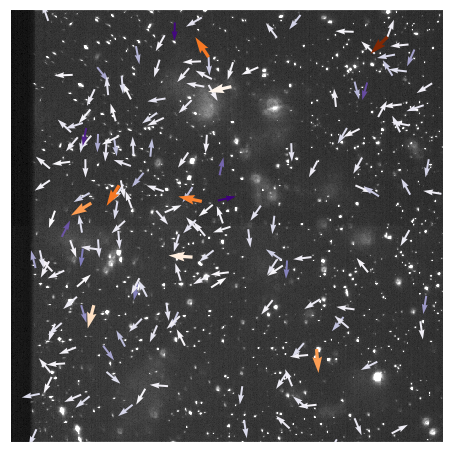

In [214]:
visualization(im[:,:512],figsize=(6,6))
dl = 0.1
ax = gca()
amp = sqrt((xt**2).sum(axis=1))
xxt = (xt.transpose()/amp).transpose()
ax.quiver(posA[:,0],posA[:,1],xxt[:,0]*dl,xxt[:,1]*dl,amp/max(amp),cmap=cmappurple)
amp = sqrt((xtB**2).sum(axis=1))
xxt = (xtB.transpose()/amp).transpose()
ax.quiver(posB[:,0],posB[:,1],xxt[:,0]*dl,xxt[:,1]*dl,amp/max(amp),cmap=cmaporanges)

Text(0.5,1,'Beads')

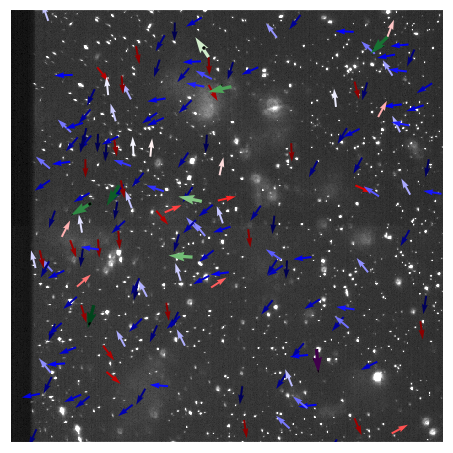

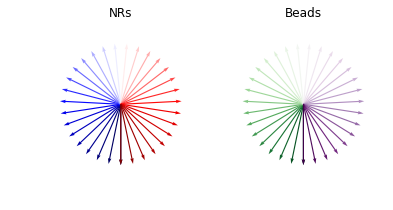

In [215]:
visualization(im[:,:512],figsize=(6,6))
dl = 0.1
dl2 = 0.2

ax = gca()
amp = sqrt((xt**2).sum(axis=1))
xxt = (xt.transpose()/amp).transpose()
angle = arctan2(xxt[:,0],xxt[:,1])
ax.quiver(posA[:,0],posA[:,1],xxt[:,0]*dl,xxt[:,1]*dl,angle,cmap=cmase)
amp = sqrt((xtB**2).sum(axis=1))
xxt = (xtB.transpose()/amp).transpose()
angle = arctan2(xxt[:,0],xxt[:,1])
ax.quiver(posB[:,0],posB[:,1],xxt[:,0]*dl,xxt[:,1]*dl,angle,cmap=cmapprgn,hatch = '.')
fig,ax = subplots(1,2,figsize=(6,3))
arrowbarcirc(ax[0],cmase,scalep=2.5,phi=pi)
arrowbarcirc(ax[1],cmapprgn,scalep=2.5,phi=pi)
ax[0].set_title("NRs")
ax[1].set_title("Beads")

In [216]:
ni = 9
i = 2
im = projectmovie(dfileswB[i])

ddt = driftNR*1.0

sx,sy = stNRs[i]
sx,sy = (sx*1,sy*1)
xt = 1.0*ddt[ddt[:,-1]==ni,:]
idx = arange(xt.shape[0])
mx = xt[isfinite(xt[:,0])].mean(axis=0)
sel = (abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy)*(xt[:,3]<0.1)*(xt[:,4]<0.1)
idcs = arange(xt.shape[0])[sel]
idcA = idcs[idcs<posNR[0].shape[0]]
xt = xt[idcA,:]
xt = xt[:,:2]/abs(xt[:,:2]).max(axis=0)
posA = posNR[0][idcA,:]


ddt = driftBeads*1.0

sx,sy = stBeads[i]
sx,sy = (sx*1,sy*1)
xtB = 1.0*ddt[ddt[:,-1]==i,:]
idx = arange(xt.shape[0])
mx = xtB[isfinite(xtB[:,0])].mean(axis=0)
sel = (abs(xtB[:,0]-mx[0])<sx)*(abs(xtB[:,1]-mx[1])<sy)*(xtB[:,3]<0.1)*(xtB[:,4]<0.1)
idcs = arange(xtB.shape[0])[sel]
idcA = idcs # [idcs<posBeads[0].shape[0]]
xtB = xtB[idcA,:]
xtB = xtB[:,:2]/abs(xtB[:,:2]).max(axis=0)
posB = posBeads[0][idcA,:]

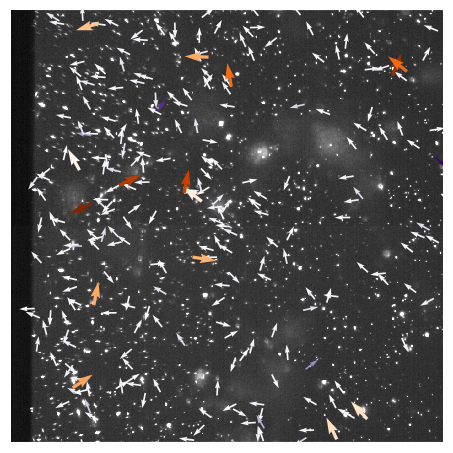

In [217]:
visualization(im[:,:512],figsize=(6,6))
dl = 0.1
ax = gca()
amp = sqrt((xt**2).sum(axis=1))
xxt = (xt.transpose()/amp).transpose()
ax.quiver(posA[:,0],posA[:,1],xxt[:,0]*dl,xxt[:,1]*dl,amp/max(amp),cmap=cmappurple)
amp = sqrt((xtB**2).sum(axis=1))
xxt = (xtB.transpose()/amp).transpose()
ax.quiver(posB[:,0],posB[:,1],xxt[:,0]*dl,xxt[:,1]*dl,amp/max(amp),cmap=cmaporanges)

Text(0.5,1,'Beads')

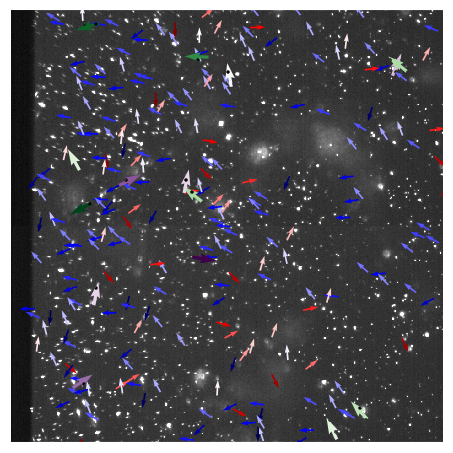

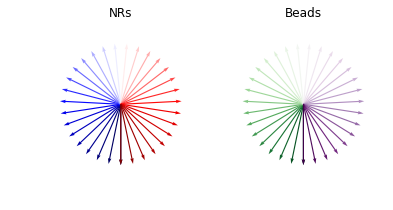

In [218]:
visualization(im[:,:512],figsize=(6,6))
dl = 0.1
dl2 = 0.2

ax = gca()
amp = sqrt((xt**2).sum(axis=1))
xxt = (xt.transpose()/amp).transpose()
angle = arctan2(xxt[:,0],xxt[:,1])
ax.quiver(posA[:,0],posA[:,1],xxt[:,0]*dl,xxt[:,1]*dl,angle,cmap=cmase)
amp = sqrt((xtB**2).sum(axis=1))
xxt = (xtB.transpose()/amp).transpose()
angle = arctan2(xxt[:,0],xxt[:,1])
ax.quiver(posB[:,0],posB[:,1],xxt[:,0]*dl,xxt[:,1]*dl,angle,cmap=cmapprgn,hatch = '.')
fig,ax = subplots(1,2,figsize=(6,3))
arrowbarcirc(ax[0],cmase,scalep=2.5,phi=pi)
arrowbarcirc(ax[1],cmapprgn,scalep=2.5,phi=pi)
ax[0].set_title("NRs")
ax[1].set_title("Beads")

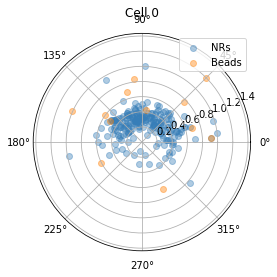

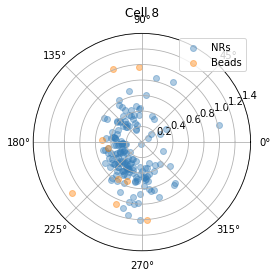

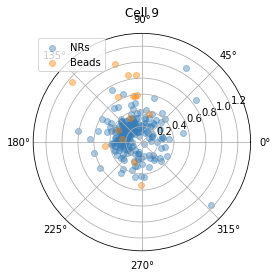

In [223]:

for i,ni in enumerate([0,8,9]):
    fig = figure()
    ax = fig.add_subplot(111, projection='polar')

    ddt = driftNR*1.0

    sx,sy = stNRs[i]
    sx,sy = (sx*1,sy*1)
    xt = 1.0*ddt[ddt[:,-1]==ni,:]
    idx = arange(xt.shape[0])
    mx = xt[isfinite(xt[:,0])].mean(axis=0)
    sel = (abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy)*(xt[:,3]<0.1)*(xt[:,4]<0.1)
    idcs = arange(xt.shape[0])[sel]
    idcA = idcs[idcs<posNR[0].shape[0]]
    xt = xt[idcA,:]
    xt = xt[:,:2]/abs(xt[:,:2]).max(axis=0)
    
    amp = sqrt((xt**2).sum(axis=1))
    xxt = (xt.transpose()/amp).transpose()
    angle = arctan2(xxt[:,1],xxt[:,0])
    ax.scatter(angle, sqrt(amp), alpha=0.4,label='NRs')
    

    ddt = driftBeads*1.0

    sx,sy = stBeads[i]
    sx,sy = (sx*1,sy*1)
    xtB = 1.0*ddt[ddt[:,-1]==i,:]
    idx = arange(xt.shape[0])
    mx = xtB[isfinite(xtB[:,0])].mean(axis=0)
    sel = (abs(xtB[:,0]-mx[0])<sx)*(abs(xtB[:,1]-mx[1])<sy)*(xtB[:,3]<0.1)*(xtB[:,4]<0.1)
    idcs = arange(xtB.shape[0])[sel]
    idcA = idcs # [idcs<posBeads[0].shape[0]]
    xt = xt[idcA,:]
    xt = xt[:,:2]/abs(xt[:,:2]).max(axis=0)
    amp = sqrt((xt**2).sum(axis=1))
    xxt = (xt.transpose()/amp).transpose()
    angle = arctan2(xxt[:,1],xxt[:,0])
    ax.scatter(angle, sqrt(amp), alpha=0.4,label='Beads')
    legend()
    title("Cell "+str(ni))
    savefig("Radarplots_"+str(i)+".png")

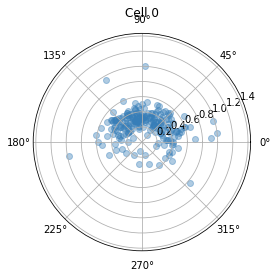

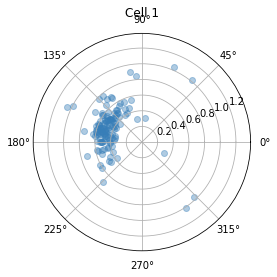

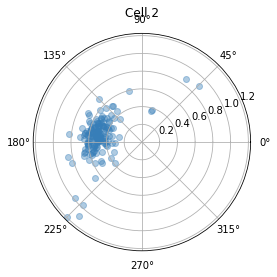

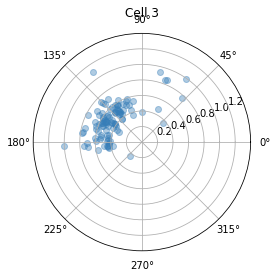

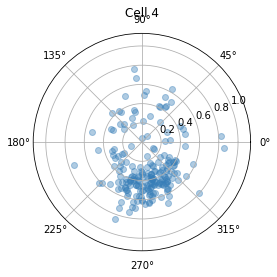

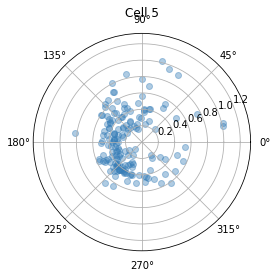

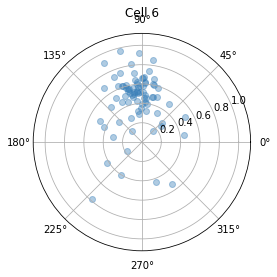

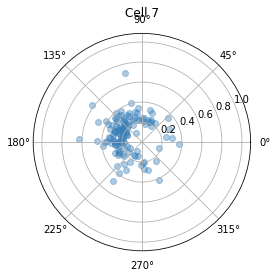

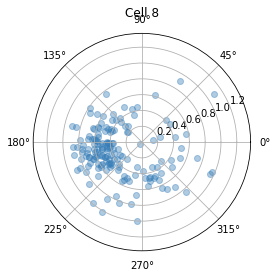

In [224]:
for i,ni in enumerate(arange(9)):
    fig = figure()
    ax = fig.add_subplot(111, projection='polar')

    ddt = driftNR*1.0

    sx,sy = stNRs[i]
    sx,sy = (sx*1,sy*1)
    xt = 1.0*ddt[ddt[:,-1]==ni,:]
    idx = arange(xt.shape[0])
    mx = xt[isfinite(xt[:,0])].mean(axis=0)
    sel = (abs(xt[:,0]-mx[0])<sx)*(abs(xt[:,1]-mx[1])<sy)*(xt[:,3]<0.1)*(xt[:,4]<0.1)
    idcs = arange(xt.shape[0])[sel]
    idcA = idcs[idcs<posNR[0].shape[0]]
    xt = xt[idcA,:]
    xt = xt[:,:2]/abs(xt[:,:2]).max(axis=0)
    
    amp = sqrt((xt**2).sum(axis=1))
    xxt = (xt.transpose()/amp).transpose()
    angle = arctan2(xxt[:,1],xxt[:,0])
    ax.scatter(angle, sqrt(amp), alpha=0.4,label='NRs')
    
    title("Cell "+str(ni))
    savefig("RadarplotNR"+str(i)+".png")

In [222]:
arctan2?